In [1]:
import pickle

file_name_x = 'X_trainingAll1.p'
file_name_y = 'Y_trainingAll1.p'
total_data_x = pickle.load(open(file_name_x, "rb"))
total_data_y = pickle.load(open(file_name_y, "rb"))

In [2]:
#the first step is to clean the data structure a little bit
#we are turning the datastructure from a pickle file to two matrices
#There is one matrix for training input data and one matrix for training label
#each row is an example and each column is a feature
import numpy as np

features_list = [feature for feature in total_data_x]
targets_list = [feature for feature in total_data_y]
Numsamples = len(total_data_x[features_list[0]])
Numfeatures = len(total_data_x)
Numtargets = len(total_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = total_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = total_data_y[targets_list[j]][i][0]
            
total_data_x = x_data
total_data_y = y_data

In [3]:
total_data_x.shape,total_data_y.shape

((1031, 6), (1031, 12))

In [4]:
file_name_x = 'X_trainingAll2.p'
file_name_y = 'Y_trainingAll2.p'
total_data_x2 = pickle.load(open(file_name_x, "rb"))
total_data_y2 = pickle.load(open(file_name_y, "rb"))

In [5]:
#just transforming the data structure but for the second batch of GPT generated training data

features_list = [feature for feature in total_data_x2]
targets_list = [feature for feature in total_data_y2]
Numsamples = len(total_data_x2[features_list[0]])
Numfeatures = len(total_data_x2)
Numtargets = len(total_data_y2)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = total_data_x2[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = total_data_y2[targets_list[j]][i][0]
            
total_data_x2 = x_data
total_data_y2 = y_data

In [6]:
total_data_x2.shape,total_data_y2.shape

((2069, 6), (2069, 12))

In [7]:
file_name_x = 'X_trainingAll3.p'
file_name_y = 'Y_trainingAll3.p'
total_data_x3 = pickle.load(open(file_name_x, "rb"))
total_data_y3 = pickle.load(open(file_name_y, "rb"))

In [8]:
#just transforming the data structure but for the third batch of GPT generated training data


features_list = [feature for feature in total_data_x3]
targets_list = [feature for feature in total_data_y3]
Numsamples = len(total_data_x3[features_list[0]])
Numfeatures = len(total_data_x3)
Numtargets = len(total_data_y3)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = total_data_x3[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = total_data_y3[targets_list[j]][i][0]
            
total_data_x3 = x_data
total_data_y3 = y_data

In [9]:
total_data_x3.shape,total_data_y3.shape

((1061, 6), (1061, 12))

In [10]:
targets_list = new_targets_list

In [11]:
#so, we don't include px,x,y,py, and twiss gamma
total_data_y = total_data_y[:,~np.all(total_data_y == 0, axis=0)]
total_data_y2 = total_data_y2[:,~np.all(total_data_y2 == 0, axis=0)]

In [12]:
#just combining data into one large file
total_data_y=np.concatenate((total_data_y,total_data_y2),axis=0)
total_data_x=np.concatenate((total_data_x,total_data_x2),axis=0)

In [13]:
print('the max emittance before cleaning data is',max(total_data_y[:,0]))
print('the min emittance before cleaning data is',min(total_data_y[:,0]))

the max emittance before cleaning data is 2.1496871484843227
the min emittance before cleaning data is 0.1631729029301908


In [14]:
for index in range(0,len(features_list)):
    print('the feature is',features_list[index])
    print(max(total_data_x[:,index]))
    print(min(total_data_x[:,index]))
    print(' ')

the feature is sol_1_current
-2.500271284796115
-3.4998998372817263
 
the feature is sol_2_current
2.7997226527984225
1.8002290019167755
 
the feature is A3Quad_1_current
-6.000001333817787
-7.999294097181149
 
the feature is A3Quad_2_current
6.499712805247474
4.500395119388785
 
the feature is A3Quad_3_current
4.599514018514804
2.6000409515918976
 
the feature is A3Quad_4_current
-7.300949564186164
-9.299995437108834
 


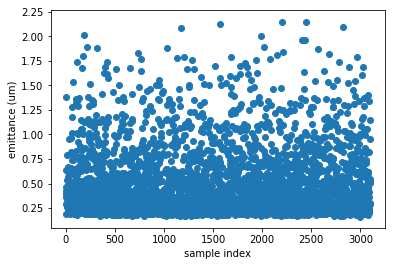

In [15]:
#first, let's plot all the emittance and make sure this is sensible
import matplotlib.pyplot as plt
x_axis=[]
for index in range(0,total_data_x.shape[0]):
    x_axis.append(index)
plt.scatter(x_axis,total_data_y[:,0])
plt.xlabel('sample index')
plt.ylabel('emittance (um)')
plt.show()

In [16]:
max_allowed_emittance = 1

In [17]:
#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(total_data_y[:, features_index])
    std = np.std(total_data_y[:, features_index])
    
    for index in range(0, total_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if total_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    
    total_data_x = total_data_x[keep_index, :]
    total_data_y = total_data_y[keep_index, :]

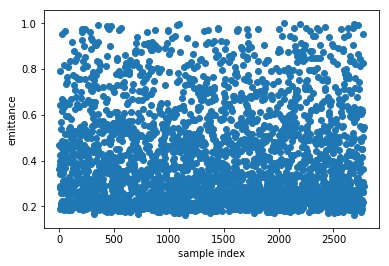

In [18]:
#now,let's check the emittance is below 1um
#first, let's plot all the emittance and make sure this is sensible
import matplotlib.pyplot as plt
x_axis=[]
for index in range(0,total_data_x.shape[0]):
    x_axis.append(index)
plt.scatter(x_axis,total_data_y[:,0])
plt.xlabel('sample index')
plt.ylabel('emittance')
plt.show()

In [19]:
features_list

['sol_1_current',
 'sol_2_current',
 'A3Quad_1_current',
 'A3Quad_2_current',
 'A3Quad_3_current',
 'A3Quad_4_current']

In [20]:
#now, I am going to throw emittance away as an output because we don't need to use emittance
total_data_y=total_data_y[:,1::]

In [21]:
total_data_x.shape,total_data_y.shape

((2777, 6), (2777, 4))

In [22]:
#We now want to scale our data so that it goes from [-1,1] since we will use tanh activation function

scaled_total_data_x=((total_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
scaled_total_data_y=((total_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(scaled_total_data_y,axis=0), np.min(scaled_total_data_x,axis=0))
print('max for Y, X: ',np.max(scaled_total_data_y,axis=0), np.max(scaled_total_data_x,axis=0))

min for Y, X:  [-1. -1. -1. -1.] [-1. -1. -1. -1. -1. -1.]
max for Y, X:  [1. 1. 1. 1.] [1. 1. 1. 1. 1. 1.]


In [23]:
class per_fold_object():
    def __init__(self,training_set,validation_set):
        self.train_index=training_set
        self.val_index=validation_set

In [24]:
ints = np.random.permutation(np.arange(0,total_data_x.shape[0],1,dtype=int))

fold_list=[]

k_fold=8
percent=1.0/k_fold
for index in range(0,k_fold):
    begin_index=np.int(total_data_x.shape[0]*percent*index) 
    finish_index=np.int(total_data_x.shape[0]*percent*(index+1)) 

    ints_test = ints[begin_index : finish_index]
    
    ints_train=[]
    for i in range(0,total_data_x.shape[0]):
        if not i in ints_test:
            ints_train.append(i)
    ints_train=np.asarray(ints_train)
    
    fold_list.append(per_fold_object(ints_train,ints_test))

In [25]:

seed_value= 0
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.set_random_seed(seed_value)

from keras import backend as K
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

/Users/zuhaohua/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.models import load_model
from keras.regularizers import l2

In [27]:
model_1= Sequential()
model_1.add(Dense(16, activation='tanh', input_dim=len(features_list),activity_regularizer=l2(0.00)))
model_1.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(1, activation='linear',activity_regularizer=l2(0.00)))
model_1.compile(loss='mse',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [28]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                112       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total para

In [29]:
scaled_total_data_y1=scaled_total_data_y[:,0]
scaled_total_data_y2=scaled_total_data_y[:,1]
scaled_total_data_y3=scaled_total_data_y[:,2]
scaled_total_data_y4=scaled_total_data_y[:,3]

In [30]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

In [31]:
x_val = scaled_total_data_x[fold_list[index].val_index]
y_val = scaled_total_data_y1[fold_list[index].val_index]


history = model_1.fit(scaled_total_data_x[fold_list[index].train_index], scaled_total_data_y1[fold_list[index].train_index],
                      validation_data=(x_val, y_val),
                      epochs=10000,
                      verbose=2,
                      callbacks=[early_stop])

Train on 2429 samples, validate on 348 samples
Epoch 1/10000
 - 1s - loss: 0.0680 - mean_absolute_error: 0.2006 - mean_squared_error: 0.0680 - val_loss: 0.0440 - val_mean_absolute_error: 0.1647 - val_mean_squared_error: 0.0440
Epoch 2/10000
 - 0s - loss: 0.0392 - mean_absolute_error: 0.1523 - mean_squared_error: 0.0392 - val_loss: 0.0387 - val_mean_absolute_error: 0.1523 - val_mean_squared_error: 0.0387
Epoch 3/10000
 - 0s - loss: 0.0353 - mean_absolute_error: 0.1411 - mean_squared_error: 0.0353 - val_loss: 0.0323 - val_mean_absolute_error: 0.1341 - val_mean_squared_error: 0.0323
Epoch 4/10000
 - 0s - loss: 0.0253 - mean_absolute_error: 0.1187 - mean_squared_error: 0.0253 - val_loss: 0.0185 - val_mean_absolute_error: 0.1056 - val_mean_squared_error: 0.0185
Epoch 5/10000
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0957 - mean_squared_error: 0.0155 - val_loss: 0.0124 - val_mean_absolute_error: 0.0863 - val_mean_squared_error: 0.0124
Epoch 6/10000
 - 0s - loss: 0.0117 - mean_absolute_er

 - 0s - loss: 0.0024 - mean_absolute_error: 0.0351 - mean_squared_error: 0.0024 - val_loss: 0.0030 - val_mean_absolute_error: 0.0368 - val_mean_squared_error: 0.0030
Epoch 47/10000
 - 0s - loss: 0.0025 - mean_absolute_error: 0.0359 - mean_squared_error: 0.0025 - val_loss: 0.0033 - val_mean_absolute_error: 0.0392 - val_mean_squared_error: 0.0033
Epoch 48/10000
 - 0s - loss: 0.0023 - mean_absolute_error: 0.0340 - mean_squared_error: 0.0023 - val_loss: 0.0029 - val_mean_absolute_error: 0.0357 - val_mean_squared_error: 0.0029
Epoch 49/10000
 - 0s - loss: 0.0023 - mean_absolute_error: 0.0341 - mean_squared_error: 0.0023 - val_loss: 0.0036 - val_mean_absolute_error: 0.0375 - val_mean_squared_error: 0.0036
Epoch 50/10000
 - 0s - loss: 0.0023 - mean_absolute_error: 0.0344 - mean_squared_error: 0.0023 - val_loss: 0.0045 - val_mean_absolute_error: 0.0431 - val_mean_squared_error: 0.0045
Epoch 51/10000
 - 0s - loss: 0.0025 - mean_absolute_error: 0.0364 - mean_squared_error: 0.0025 - val_loss: 0.0

Epoch 92/10000
 - 0s - loss: 0.0016 - mean_absolute_error: 0.0288 - mean_squared_error: 0.0016 - val_loss: 0.0021 - val_mean_absolute_error: 0.0294 - val_mean_squared_error: 0.0021
Epoch 93/10000
 - 0s - loss: 0.0017 - mean_absolute_error: 0.0291 - mean_squared_error: 0.0017 - val_loss: 0.0028 - val_mean_absolute_error: 0.0321 - val_mean_squared_error: 0.0028
Epoch 94/10000
 - 0s - loss: 0.0018 - mean_absolute_error: 0.0307 - mean_squared_error: 0.0018 - val_loss: 0.0032 - val_mean_absolute_error: 0.0346 - val_mean_squared_error: 0.0032
Epoch 95/10000
 - 0s - loss: 0.0017 - mean_absolute_error: 0.0294 - mean_squared_error: 0.0017 - val_loss: 0.0024 - val_mean_absolute_error: 0.0334 - val_mean_squared_error: 0.0024
Epoch 96/10000
 - 0s - loss: 0.0020 - mean_absolute_error: 0.0319 - mean_squared_error: 0.0020 - val_loss: 0.0022 - val_mean_absolute_error: 0.0326 - val_mean_squared_error: 0.0022
Epoch 97/10000
 - 0s - loss: 0.0016 - mean_absolute_error: 0.0288 - mean_squared_error: 0.0016 

 - 0s - loss: 0.0011 - mean_absolute_error: 0.0236 - mean_squared_error: 0.0011 - val_loss: 0.0017 - val_mean_absolute_error: 0.0255 - val_mean_squared_error: 0.0017
Epoch 138/10000
 - 0s - loss: 0.0010 - mean_absolute_error: 0.0224 - mean_squared_error: 0.0010 - val_loss: 0.0021 - val_mean_absolute_error: 0.0278 - val_mean_squared_error: 0.0021
Epoch 139/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0232 - mean_squared_error: 0.0011 - val_loss: 0.0015 - val_mean_absolute_error: 0.0236 - val_mean_squared_error: 0.0015
Epoch 140/10000
 - 0s - loss: 0.0010 - mean_absolute_error: 0.0225 - mean_squared_error: 0.0010 - val_loss: 0.0013 - val_mean_absolute_error: 0.0245 - val_mean_squared_error: 0.0013
Epoch 141/10000
 - 0s - loss: 9.5930e-04 - mean_absolute_error: 0.0216 - mean_squared_error: 9.5930e-04 - val_loss: 0.0019 - val_mean_absolute_error: 0.0264 - val_mean_squared_error: 0.0019
Epoch 142/10000
 - 0s - loss: 0.0010 - mean_absolute_error: 0.0226 - mean_squared_error: 0.0010 - 

Epoch 181/10000
 - 0s - loss: 7.7538e-04 - mean_absolute_error: 0.0194 - mean_squared_error: 7.7538e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0198 - val_mean_squared_error: 0.0010
Epoch 182/10000
 - 0s - loss: 7.7062e-04 - mean_absolute_error: 0.0192 - mean_squared_error: 7.7062e-04 - val_loss: 9.6931e-04 - val_mean_absolute_error: 0.0196 - val_mean_squared_error: 9.6931e-04
Epoch 183/10000
 - 0s - loss: 7.4651e-04 - mean_absolute_error: 0.0191 - mean_squared_error: 7.4651e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0222 - val_mean_squared_error: 0.0012
Epoch 184/10000
 - 0s - loss: 8.8701e-04 - mean_absolute_error: 0.0209 - mean_squared_error: 8.8701e-04 - val_loss: 0.0013 - val_mean_absolute_error: 0.0209 - val_mean_squared_error: 0.0013
Epoch 185/10000
 - 0s - loss: 6.9464e-04 - mean_absolute_error: 0.0183 - mean_squared_error: 6.9464e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0208 - val_mean_squared_error: 0.0012
Epoch 186/10000
 - 0s - loss: 7.6675e-04 -

Epoch 224/10000
 - 0s - loss: 6.7060e-04 - mean_absolute_error: 0.0183 - mean_squared_error: 6.7060e-04 - val_loss: 8.3841e-04 - val_mean_absolute_error: 0.0192 - val_mean_squared_error: 8.3841e-04
Epoch 225/10000
 - 0s - loss: 7.3731e-04 - mean_absolute_error: 0.0194 - mean_squared_error: 7.3731e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0200 - val_mean_squared_error: 0.0010
Epoch 226/10000
 - 0s - loss: 6.3803e-04 - mean_absolute_error: 0.0175 - mean_squared_error: 6.3803e-04 - val_loss: 9.9303e-04 - val_mean_absolute_error: 0.0213 - val_mean_squared_error: 9.9303e-04
Epoch 227/10000
 - 0s - loss: 6.8862e-04 - mean_absolute_error: 0.0186 - mean_squared_error: 6.8862e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0193 - val_mean_squared_error: 0.0010
Epoch 228/10000
 - 0s - loss: 6.3876e-04 - mean_absolute_error: 0.0177 - mean_squared_error: 6.3876e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0185 - val_mean_squared_error: 0.0010
Epoch 229/10000
 - 0s - loss: 6.14

Epoch 267/10000
 - 0s - loss: 6.0987e-04 - mean_absolute_error: 0.0175 - mean_squared_error: 6.0987e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0216 - val_mean_squared_error: 0.0012
Epoch 268/10000
 - 0s - loss: 5.9304e-04 - mean_absolute_error: 0.0175 - mean_squared_error: 5.9304e-04 - val_loss: 8.2567e-04 - val_mean_absolute_error: 0.0181 - val_mean_squared_error: 8.2567e-04
Epoch 269/10000
 - 0s - loss: 6.3237e-04 - mean_absolute_error: 0.0176 - mean_squared_error: 6.3237e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0193 - val_mean_squared_error: 0.0010
Epoch 270/10000
 - 0s - loss: 5.7036e-04 - mean_absolute_error: 0.0166 - mean_squared_error: 5.7036e-04 - val_loss: 7.9531e-04 - val_mean_absolute_error: 0.0171 - val_mean_squared_error: 7.9531e-04
Epoch 271/10000
 - 0s - loss: 5.8682e-04 - mean_absolute_error: 0.0169 - mean_squared_error: 5.8682e-04 - val_loss: 8.0754e-04 - val_mean_absolute_error: 0.0181 - val_mean_squared_error: 8.0754e-04
Epoch 272/10000
 - 0s - lo

Epoch 309/10000
 - 0s - loss: 4.9825e-04 - mean_absolute_error: 0.0157 - mean_squared_error: 4.9825e-04 - val_loss: 6.7716e-04 - val_mean_absolute_error: 0.0155 - val_mean_squared_error: 6.7716e-04
Epoch 310/10000
 - 0s - loss: 4.8347e-04 - mean_absolute_error: 0.0152 - mean_squared_error: 4.8347e-04 - val_loss: 7.6312e-04 - val_mean_absolute_error: 0.0165 - val_mean_squared_error: 7.6312e-04
Epoch 311/10000
 - 0s - loss: 5.3171e-04 - mean_absolute_error: 0.0161 - mean_squared_error: 5.3171e-04 - val_loss: 8.6799e-04 - val_mean_absolute_error: 0.0169 - val_mean_squared_error: 8.6799e-04
Epoch 312/10000
 - 0s - loss: 5.0268e-04 - mean_absolute_error: 0.0156 - mean_squared_error: 5.0268e-04 - val_loss: 7.5348e-04 - val_mean_absolute_error: 0.0162 - val_mean_squared_error: 7.5348e-04
Epoch 313/10000
 - 0s - loss: 4.8610e-04 - mean_absolute_error: 0.0154 - mean_squared_error: 4.8610e-04 - val_loss: 8.1131e-04 - val_mean_absolute_error: 0.0178 - val_mean_squared_error: 8.1131e-04
Epoch 314/

Epoch 351/10000
 - 0s - loss: 4.2904e-04 - mean_absolute_error: 0.0147 - mean_squared_error: 4.2904e-04 - val_loss: 7.4443e-04 - val_mean_absolute_error: 0.0154 - val_mean_squared_error: 7.4443e-04
Epoch 352/10000
 - 0s - loss: 4.4015e-04 - mean_absolute_error: 0.0145 - mean_squared_error: 4.4015e-04 - val_loss: 7.8310e-04 - val_mean_absolute_error: 0.0175 - val_mean_squared_error: 7.8310e-04
Epoch 353/10000
 - 0s - loss: 4.3481e-04 - mean_absolute_error: 0.0146 - mean_squared_error: 4.3481e-04 - val_loss: 7.4526e-04 - val_mean_absolute_error: 0.0176 - val_mean_squared_error: 7.4526e-04
Epoch 354/10000
 - 0s - loss: 4.3641e-04 - mean_absolute_error: 0.0146 - mean_squared_error: 4.3641e-04 - val_loss: 7.1753e-04 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 7.1753e-04
Epoch 355/10000
 - 0s - loss: 4.6173e-04 - mean_absolute_error: 0.0152 - mean_squared_error: 4.6173e-04 - val_loss: 9.5337e-04 - val_mean_absolute_error: 0.0202 - val_mean_squared_error: 9.5337e-04
Epoch 356/

Epoch 393/10000
 - 0s - loss: 3.6265e-04 - mean_absolute_error: 0.0130 - mean_squared_error: 3.6265e-04 - val_loss: 6.5862e-04 - val_mean_absolute_error: 0.0150 - val_mean_squared_error: 6.5862e-04
Epoch 394/10000
 - 0s - loss: 4.5872e-04 - mean_absolute_error: 0.0153 - mean_squared_error: 4.5872e-04 - val_loss: 5.5331e-04 - val_mean_absolute_error: 0.0147 - val_mean_squared_error: 5.5331e-04
Epoch 395/10000
 - 0s - loss: 3.6731e-04 - mean_absolute_error: 0.0135 - mean_squared_error: 3.6731e-04 - val_loss: 7.1575e-04 - val_mean_absolute_error: 0.0165 - val_mean_squared_error: 7.1575e-04
Epoch 396/10000
 - 0s - loss: 4.8128e-04 - mean_absolute_error: 0.0157 - mean_squared_error: 4.8128e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0188 - val_mean_squared_error: 0.0010
Epoch 397/10000
 - 0s - loss: 3.7850e-04 - mean_absolute_error: 0.0135 - mean_squared_error: 3.7850e-04 - val_loss: 8.1310e-04 - val_mean_absolute_error: 0.0188 - val_mean_squared_error: 8.1310e-04
Epoch 398/10000
 -

Epoch 435/10000
 - 0s - loss: 3.7205e-04 - mean_absolute_error: 0.0138 - mean_squared_error: 3.7205e-04 - val_loss: 4.8567e-04 - val_mean_absolute_error: 0.0135 - val_mean_squared_error: 4.8567e-04
Epoch 436/10000
 - 0s - loss: 3.3421e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.3421e-04 - val_loss: 5.7912e-04 - val_mean_absolute_error: 0.0153 - val_mean_squared_error: 5.7912e-04
Epoch 437/10000
 - 0s - loss: 3.6679e-04 - mean_absolute_error: 0.0137 - mean_squared_error: 3.6679e-04 - val_loss: 5.9959e-04 - val_mean_absolute_error: 0.0163 - val_mean_squared_error: 5.9959e-04
Epoch 438/10000
 - 0s - loss: 3.5597e-04 - mean_absolute_error: 0.0130 - mean_squared_error: 3.5597e-04 - val_loss: 4.7934e-04 - val_mean_absolute_error: 0.0133 - val_mean_squared_error: 4.7934e-04
Epoch 439/10000
 - 0s - loss: 3.4713e-04 - mean_absolute_error: 0.0130 - mean_squared_error: 3.4713e-04 - val_loss: 5.1809e-04 - val_mean_absolute_error: 0.0156 - val_mean_squared_error: 5.1809e-04
Epoch 440/

Epoch 477/10000
 - 0s - loss: 3.0348e-04 - mean_absolute_error: 0.0125 - mean_squared_error: 3.0348e-04 - val_loss: 6.5181e-04 - val_mean_absolute_error: 0.0171 - val_mean_squared_error: 6.5181e-04
Epoch 478/10000
 - 0s - loss: 3.5638e-04 - mean_absolute_error: 0.0137 - mean_squared_error: 3.5638e-04 - val_loss: 6.0784e-04 - val_mean_absolute_error: 0.0174 - val_mean_squared_error: 6.0784e-04
Epoch 479/10000
 - 0s - loss: 3.2688e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.2688e-04 - val_loss: 5.1049e-04 - val_mean_absolute_error: 0.0154 - val_mean_squared_error: 5.1049e-04
Epoch 480/10000
 - 0s - loss: 2.9402e-04 - mean_absolute_error: 0.0123 - mean_squared_error: 2.9402e-04 - val_loss: 5.0660e-04 - val_mean_absolute_error: 0.0140 - val_mean_squared_error: 5.0660e-04
Epoch 481/10000
 - 0s - loss: 3.1825e-04 - mean_absolute_error: 0.0129 - mean_squared_error: 3.1825e-04 - val_loss: 3.5878e-04 - val_mean_absolute_error: 0.0125 - val_mean_squared_error: 3.5878e-04
Epoch 482/

Epoch 519/10000
 - 0s - loss: 3.3599e-04 - mean_absolute_error: 0.0130 - mean_squared_error: 3.3599e-04 - val_loss: 7.6622e-04 - val_mean_absolute_error: 0.0167 - val_mean_squared_error: 7.6622e-04
Epoch 520/10000
 - 0s - loss: 3.7356e-04 - mean_absolute_error: 0.0139 - mean_squared_error: 3.7356e-04 - val_loss: 4.1474e-04 - val_mean_absolute_error: 0.0131 - val_mean_squared_error: 4.1474e-04
Epoch 521/10000
 - 0s - loss: 3.2585e-04 - mean_absolute_error: 0.0132 - mean_squared_error: 3.2585e-04 - val_loss: 6.5383e-04 - val_mean_absolute_error: 0.0193 - val_mean_squared_error: 6.5383e-04
Epoch 522/10000
 - 0s - loss: 3.0849e-04 - mean_absolute_error: 0.0126 - mean_squared_error: 3.0849e-04 - val_loss: 6.4117e-04 - val_mean_absolute_error: 0.0158 - val_mean_squared_error: 6.4117e-04
Epoch 523/10000
 - 0s - loss: 3.1813e-04 - mean_absolute_error: 0.0129 - mean_squared_error: 3.1813e-04 - val_loss: 5.2514e-04 - val_mean_absolute_error: 0.0133 - val_mean_squared_error: 5.2514e-04
Epoch 524/

Epoch 561/10000
 - 0s - loss: 2.7481e-04 - mean_absolute_error: 0.0120 - mean_squared_error: 2.7481e-04 - val_loss: 3.5826e-04 - val_mean_absolute_error: 0.0119 - val_mean_squared_error: 3.5826e-04
Epoch 562/10000
 - 0s - loss: 2.5814e-04 - mean_absolute_error: 0.0112 - mean_squared_error: 2.5814e-04 - val_loss: 4.3135e-04 - val_mean_absolute_error: 0.0135 - val_mean_squared_error: 4.3135e-04
Epoch 563/10000
 - 0s - loss: 2.3648e-04 - mean_absolute_error: 0.0110 - mean_squared_error: 2.3648e-04 - val_loss: 4.2274e-04 - val_mean_absolute_error: 0.0130 - val_mean_squared_error: 4.2274e-04
Epoch 564/10000
 - 0s - loss: 2.6279e-04 - mean_absolute_error: 0.0116 - mean_squared_error: 2.6279e-04 - val_loss: 3.9345e-04 - val_mean_absolute_error: 0.0133 - val_mean_squared_error: 3.9345e-04
Epoch 565/10000
 - 0s - loss: 2.9075e-04 - mean_absolute_error: 0.0122 - mean_squared_error: 2.9075e-04 - val_loss: 6.6508e-04 - val_mean_absolute_error: 0.0184 - val_mean_squared_error: 6.6508e-04
Epoch 566/

Epoch 603/10000
 - 0s - loss: 3.0226e-04 - mean_absolute_error: 0.0128 - mean_squared_error: 3.0226e-04 - val_loss: 6.4614e-04 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 6.4614e-04
Epoch 604/10000
 - 0s - loss: 2.8430e-04 - mean_absolute_error: 0.0122 - mean_squared_error: 2.8430e-04 - val_loss: 3.6227e-04 - val_mean_absolute_error: 0.0128 - val_mean_squared_error: 3.6227e-04
Epoch 605/10000
 - 0s - loss: 2.4943e-04 - mean_absolute_error: 0.0113 - mean_squared_error: 2.4943e-04 - val_loss: 3.1487e-04 - val_mean_absolute_error: 0.0117 - val_mean_squared_error: 3.1487e-04
Epoch 606/10000
 - 0s - loss: 2.3867e-04 - mean_absolute_error: 0.0110 - mean_squared_error: 2.3867e-04 - val_loss: 5.3681e-04 - val_mean_absolute_error: 0.0139 - val_mean_squared_error: 5.3681e-04
Epoch 607/10000
 - 0s - loss: 2.7404e-04 - mean_absolute_error: 0.0119 - mean_squared_error: 2.7404e-04 - val_loss: 4.5590e-04 - val_mean_absolute_error: 0.0137 - val_mean_squared_error: 4.5590e-04
Epoch 608/

Epoch 645/10000
 - 0s - loss: 2.3545e-04 - mean_absolute_error: 0.0109 - mean_squared_error: 2.3545e-04 - val_loss: 3.4018e-04 - val_mean_absolute_error: 0.0121 - val_mean_squared_error: 3.4018e-04
Epoch 646/10000
 - 0s - loss: 2.3076e-04 - mean_absolute_error: 0.0113 - mean_squared_error: 2.3076e-04 - val_loss: 5.3628e-04 - val_mean_absolute_error: 0.0159 - val_mean_squared_error: 5.3628e-04
Epoch 647/10000
 - 0s - loss: 2.6231e-04 - mean_absolute_error: 0.0119 - mean_squared_error: 2.6231e-04 - val_loss: 4.9550e-04 - val_mean_absolute_error: 0.0131 - val_mean_squared_error: 4.9550e-04
Epoch 648/10000
 - 0s - loss: 2.2532e-04 - mean_absolute_error: 0.0108 - mean_squared_error: 2.2532e-04 - val_loss: 3.7939e-04 - val_mean_absolute_error: 0.0121 - val_mean_squared_error: 3.7939e-04
Epoch 649/10000
 - 0s - loss: 2.3653e-04 - mean_absolute_error: 0.0111 - mean_squared_error: 2.3653e-04 - val_loss: 4.3368e-04 - val_mean_absolute_error: 0.0136 - val_mean_squared_error: 4.3368e-04
Epoch 650/

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

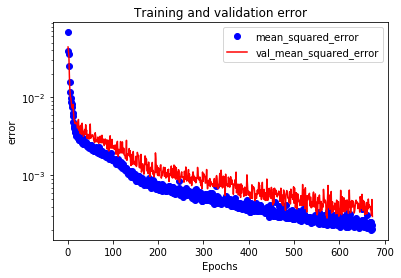

In [33]:
acc = history_dict['mean_squared_error']
val_acc = history_dict['val_mean_squared_error']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='mean_squared_error')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'r', label='val_mean_squared_error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.yscale('log')
plt.legend()

plt.show()

In [34]:
#now, let's test the performance of the first model

In [35]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justsol1.p'
file_name_y = 'Y_test_justsol1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [36]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.05023064 -0.66059884 -0.13647417 -0.99356736] [-9.77221131e-01 -3.99718933e-02 -3.52509135e-04 -5.39802526e-05
  2.22575002e-04  4.72626391e-04]
max for Y, X:  [ 0.65633652 -0.24603813  0.94158853  0.19412154] [ 9.86662770e-01 -3.99716951e-02 -3.52409321e-04 -5.38807062e-05
  2.22670742e-04  4.72725766e-04]


In [37]:
sort_index=np.argsort(test_data_x[:,0])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [38]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_1.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

In [39]:
targets_list

['max_enxy', 'twiss_x_alpha', 'twiss_x_beta', 'twiss_y_alpha', 'twiss_y_beta']

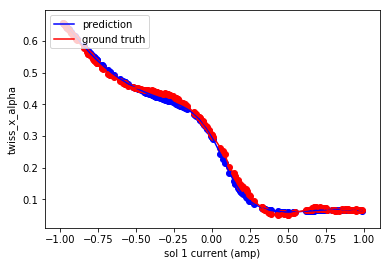

In [40]:
#now, we graph the result

#x_alpha

how_many_data_to_plot=300
which_parameter_to_plot=0

x_axis=test_data_x[:,0]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('sol 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [41]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad4.p'
file_name_y = 'Y_test_justquad4.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [42]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.20493509 -0.52765214  0.18701863 -0.75480081] [ 1.70986132e-04 -3.99718939e-02 -5.00529291e-01 -5.39807049e-05
  2.22573685e-04 -9.80478841e-01]
max for Y, X:  [ 0.22871819 -0.34454687  0.73103692 -0.02952656] [ 1.71185628e-04 -3.99716949e-02 -5.00529281e-01 -5.39707447e-05
  2.22583536e-04  9.98432247e-01]


In [43]:
for index in range(0,len(features_list)):
    print('the feature is',features_list[index])
    print(max(test_data_x[:,index]))
    print(min(test_data_x[:,index]))
    print(' ')

the feature is sol_1_current
0.00017118562777285184
0.00017098613217991776
 
the feature is sol_2_current
-0.0399716948643154
-0.039971893923888335
 
the feature is A3Quad_1_current
-0.5005292809889976
-0.5005292907326065
 
the feature is A3Quad_2_current
-5.397074471191754e-05
-5.398070491413609e-05
 
the feature is A3Quad_3_current
0.0002225835360389894
0.0002225736848140425
 
the feature is A3Quad_4_current
0.9984322472742189
-0.9804788406400338
 


In [44]:
sort_index=np.argsort(test_data_x[:,5])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [45]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_1.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

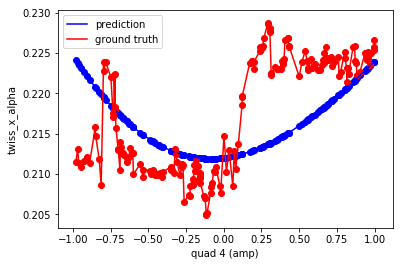

In [46]:
#now, we graph the result

#x_alpha

how_many_data_to_plot=300
which_parameter_to_plot=0

x_axis=test_data_x[:,5]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 4 (amp)')
plt.legend(loc='upper left')

plt.show()

In [47]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad1.p'
file_name_y = 'Y_test_justquad1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [48]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.2623439  -0.67689954  0.22886399 -0.75292571] [-1.79895899e-01 -3.99718943e-02 -9.67564791e-01 -5.39805878e-05
  2.22574874e-04  4.72626373e-04]
max for Y, X:  [ 0.53386497 -0.48101427  0.7992093  -0.1885591 ] [-1.79895700e-01 -3.99716951e-02  9.88009255e-01 -5.38811150e-05
  2.22673212e-04  4.72725885e-04]


In [49]:
sort_index=np.argsort(test_data_x[:,2])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [50]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_1.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

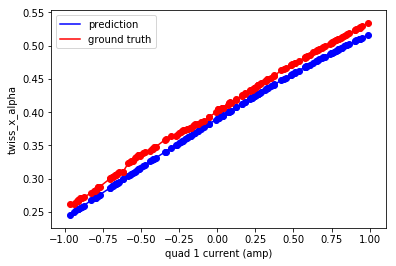

In [51]:
#now, we graph the result

#x_alpha

how_many_data_to_plot=300
which_parameter_to_plot=0

x_axis=test_data_x[:,2]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

# now, we train the second model

In [52]:
model_2= Sequential()
model_2.add(Dense(16, activation='tanh', input_dim=len(features_list),activity_regularizer=l2(0.00)))
model_2.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_2.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_2.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_2.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_2.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_2.add(Dense(1, activation='linear',activity_regularizer=l2(0.00)))
model_2.compile(loss='mse',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [53]:
index=0
x_val = scaled_total_data_x[fold_list[index].val_index]
y_val = scaled_total_data_y2[fold_list[index].val_index]


history = model_2.fit(scaled_total_data_x[fold_list[index].train_index], scaled_total_data_y2[fold_list[index].train_index],
                      validation_data=(x_val, y_val),
                      epochs=10000,
                      verbose=2,
                      callbacks=[early_stop])

Train on 2430 samples, validate on 347 samples
Epoch 1/10000
 - 1s - loss: 0.1143 - mean_absolute_error: 0.2644 - mean_squared_error: 0.1143 - val_loss: 0.0423 - val_mean_absolute_error: 0.1657 - val_mean_squared_error: 0.0423
Epoch 2/10000
 - 0s - loss: 0.0388 - mean_absolute_error: 0.1577 - mean_squared_error: 0.0388 - val_loss: 0.0323 - val_mean_absolute_error: 0.1418 - val_mean_squared_error: 0.0323
Epoch 3/10000
 - 0s - loss: 0.0299 - mean_absolute_error: 0.1326 - mean_squared_error: 0.0299 - val_loss: 0.0271 - val_mean_absolute_error: 0.1220 - val_mean_squared_error: 0.0271
Epoch 4/10000
 - 0s - loss: 0.0262 - mean_absolute_error: 0.1215 - mean_squared_error: 0.0262 - val_loss: 0.0248 - val_mean_absolute_error: 0.1146 - val_mean_squared_error: 0.0248
Epoch 5/10000
 - 0s - loss: 0.0227 - mean_absolute_error: 0.1141 - mean_squared_error: 0.0227 - val_loss: 0.0210 - val_mean_absolute_error: 0.1053 - val_mean_squared_error: 0.0210
Epoch 6/10000
 - 0s - loss: 0.0201 - mean_absolute_er

 - 0s - loss: 0.0040 - mean_absolute_error: 0.0488 - mean_squared_error: 0.0040 - val_loss: 0.0040 - val_mean_absolute_error: 0.0471 - val_mean_squared_error: 0.0040
Epoch 47/10000
 - 0s - loss: 0.0037 - mean_absolute_error: 0.0473 - mean_squared_error: 0.0037 - val_loss: 0.0040 - val_mean_absolute_error: 0.0473 - val_mean_squared_error: 0.0040
Epoch 48/10000
 - 0s - loss: 0.0037 - mean_absolute_error: 0.0465 - mean_squared_error: 0.0037 - val_loss: 0.0041 - val_mean_absolute_error: 0.0474 - val_mean_squared_error: 0.0041
Epoch 49/10000
 - 0s - loss: 0.0038 - mean_absolute_error: 0.0470 - mean_squared_error: 0.0038 - val_loss: 0.0038 - val_mean_absolute_error: 0.0458 - val_mean_squared_error: 0.0038
Epoch 50/10000
 - 0s - loss: 0.0035 - mean_absolute_error: 0.0454 - mean_squared_error: 0.0035 - val_loss: 0.0036 - val_mean_absolute_error: 0.0457 - val_mean_squared_error: 0.0036
Epoch 51/10000
 - 0s - loss: 0.0034 - mean_absolute_error: 0.0447 - mean_squared_error: 0.0034 - val_loss: 0.0

Epoch 92/10000
 - 0s - loss: 0.0022 - mean_absolute_error: 0.0356 - mean_squared_error: 0.0022 - val_loss: 0.0025 - val_mean_absolute_error: 0.0368 - val_mean_squared_error: 0.0025
Epoch 93/10000
 - 0s - loss: 0.0021 - mean_absolute_error: 0.0349 - mean_squared_error: 0.0021 - val_loss: 0.0023 - val_mean_absolute_error: 0.0373 - val_mean_squared_error: 0.0023
Epoch 94/10000
 - 0s - loss: 0.0021 - mean_absolute_error: 0.0347 - mean_squared_error: 0.0021 - val_loss: 0.0021 - val_mean_absolute_error: 0.0334 - val_mean_squared_error: 0.0021
Epoch 95/10000
 - 0s - loss: 0.0022 - mean_absolute_error: 0.0357 - mean_squared_error: 0.0022 - val_loss: 0.0023 - val_mean_absolute_error: 0.0355 - val_mean_squared_error: 0.0023
Epoch 96/10000
 - 0s - loss: 0.0019 - mean_absolute_error: 0.0327 - mean_squared_error: 0.0019 - val_loss: 0.0021 - val_mean_absolute_error: 0.0330 - val_mean_squared_error: 0.0021
Epoch 97/10000
 - 0s - loss: 0.0020 - mean_absolute_error: 0.0334 - mean_squared_error: 0.0020 

 - 0s - loss: 0.0011 - mean_absolute_error: 0.0251 - mean_squared_error: 0.0011 - val_loss: 0.0012 - val_mean_absolute_error: 0.0252 - val_mean_squared_error: 0.0012
Epoch 138/10000
 - 0s - loss: 0.0010 - mean_absolute_error: 0.0243 - mean_squared_error: 0.0010 - val_loss: 0.0010 - val_mean_absolute_error: 0.0239 - val_mean_squared_error: 0.0010
Epoch 139/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0249 - mean_squared_error: 0.0011 - val_loss: 0.0011 - val_mean_absolute_error: 0.0246 - val_mean_squared_error: 0.0011
Epoch 140/10000
 - 0s - loss: 0.0010 - mean_absolute_error: 0.0243 - mean_squared_error: 0.0010 - val_loss: 0.0012 - val_mean_absolute_error: 0.0264 - val_mean_squared_error: 0.0012
Epoch 141/10000
 - 0s - loss: 0.0010 - mean_absolute_error: 0.0243 - mean_squared_error: 0.0010 - val_loss: 0.0016 - val_mean_absolute_error: 0.0292 - val_mean_squared_error: 0.0016
Epoch 142/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0247 - mean_squared_error: 0.0011 - val_loss

Epoch 180/10000
 - 0s - loss: 7.6934e-04 - mean_absolute_error: 0.0207 - mean_squared_error: 7.6934e-04 - val_loss: 9.7238e-04 - val_mean_absolute_error: 0.0214 - val_mean_squared_error: 9.7238e-04
Epoch 181/10000
 - 0s - loss: 7.0307e-04 - mean_absolute_error: 0.0195 - mean_squared_error: 7.0307e-04 - val_loss: 9.7375e-04 - val_mean_absolute_error: 0.0232 - val_mean_squared_error: 9.7375e-04
Epoch 182/10000
 - 0s - loss: 7.4629e-04 - mean_absolute_error: 0.0202 - mean_squared_error: 7.4629e-04 - val_loss: 7.2401e-04 - val_mean_absolute_error: 0.0198 - val_mean_squared_error: 7.2401e-04
Epoch 183/10000
 - 0s - loss: 8.2451e-04 - mean_absolute_error: 0.0215 - mean_squared_error: 8.2451e-04 - val_loss: 8.9888e-04 - val_mean_absolute_error: 0.0218 - val_mean_squared_error: 8.9888e-04
Epoch 184/10000
 - 0s - loss: 7.6090e-04 - mean_absolute_error: 0.0205 - mean_squared_error: 7.6090e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0244 - val_mean_squared_error: 0.0010
Epoch 185/10000
 -

Epoch 222/10000
 - 0s - loss: 5.6909e-04 - mean_absolute_error: 0.0180 - mean_squared_error: 5.6909e-04 - val_loss: 6.5301e-04 - val_mean_absolute_error: 0.0191 - val_mean_squared_error: 6.5301e-04
Epoch 223/10000
 - 0s - loss: 5.3460e-04 - mean_absolute_error: 0.0173 - mean_squared_error: 5.3460e-04 - val_loss: 7.9394e-04 - val_mean_absolute_error: 0.0210 - val_mean_squared_error: 7.9394e-04
Epoch 224/10000
 - 0s - loss: 5.7485e-04 - mean_absolute_error: 0.0184 - mean_squared_error: 5.7485e-04 - val_loss: 7.0609e-04 - val_mean_absolute_error: 0.0188 - val_mean_squared_error: 7.0609e-04
Epoch 225/10000
 - 0s - loss: 5.6945e-04 - mean_absolute_error: 0.0181 - mean_squared_error: 5.6945e-04 - val_loss: 6.2580e-04 - val_mean_absolute_error: 0.0181 - val_mean_squared_error: 6.2580e-04
Epoch 226/10000
 - 0s - loss: 5.3526e-04 - mean_absolute_error: 0.0174 - mean_squared_error: 5.3526e-04 - val_loss: 6.3921e-04 - val_mean_absolute_error: 0.0174 - val_mean_squared_error: 6.3921e-04
Epoch 227/

Epoch 264/10000
 - 0s - loss: 5.1968e-04 - mean_absolute_error: 0.0170 - mean_squared_error: 5.1968e-04 - val_loss: 5.2343e-04 - val_mean_absolute_error: 0.0168 - val_mean_squared_error: 5.2343e-04
Epoch 265/10000
 - 0s - loss: 4.9775e-04 - mean_absolute_error: 0.0167 - mean_squared_error: 4.9775e-04 - val_loss: 6.9090e-04 - val_mean_absolute_error: 0.0198 - val_mean_squared_error: 6.9090e-04
Epoch 266/10000
 - 0s - loss: 4.7497e-04 - mean_absolute_error: 0.0163 - mean_squared_error: 4.7497e-04 - val_loss: 5.0817e-04 - val_mean_absolute_error: 0.0168 - val_mean_squared_error: 5.0817e-04
Epoch 267/10000
 - 0s - loss: 4.9572e-04 - mean_absolute_error: 0.0168 - mean_squared_error: 4.9572e-04 - val_loss: 6.6198e-04 - val_mean_absolute_error: 0.0192 - val_mean_squared_error: 6.6198e-04
Epoch 268/10000
 - 0s - loss: 4.5169e-04 - mean_absolute_error: 0.0160 - mean_squared_error: 4.5169e-04 - val_loss: 5.2945e-04 - val_mean_absolute_error: 0.0172 - val_mean_squared_error: 5.2945e-04
Epoch 269/

Epoch 306/10000
 - 0s - loss: 4.2708e-04 - mean_absolute_error: 0.0156 - mean_squared_error: 4.2708e-04 - val_loss: 4.5675e-04 - val_mean_absolute_error: 0.0151 - val_mean_squared_error: 4.5675e-04
Epoch 307/10000
 - 0s - loss: 4.4553e-04 - mean_absolute_error: 0.0161 - mean_squared_error: 4.4553e-04 - val_loss: 5.9244e-04 - val_mean_absolute_error: 0.0184 - val_mean_squared_error: 5.9244e-04
Epoch 308/10000
 - 0s - loss: 4.2044e-04 - mean_absolute_error: 0.0155 - mean_squared_error: 4.2044e-04 - val_loss: 6.0588e-04 - val_mean_absolute_error: 0.0180 - val_mean_squared_error: 6.0588e-04
Epoch 309/10000
 - 0s - loss: 3.8776e-04 - mean_absolute_error: 0.0148 - mean_squared_error: 3.8776e-04 - val_loss: 4.7313e-04 - val_mean_absolute_error: 0.0155 - val_mean_squared_error: 4.7313e-04
Epoch 310/10000
 - 0s - loss: 4.2477e-04 - mean_absolute_error: 0.0156 - mean_squared_error: 4.2477e-04 - val_loss: 4.1020e-04 - val_mean_absolute_error: 0.0140 - val_mean_squared_error: 4.1020e-04
Epoch 311/

Epoch 348/10000
 - 0s - loss: 4.1443e-04 - mean_absolute_error: 0.0152 - mean_squared_error: 4.1443e-04 - val_loss: 4.0694e-04 - val_mean_absolute_error: 0.0143 - val_mean_squared_error: 4.0694e-04
Epoch 349/10000
 - 0s - loss: 3.2583e-04 - mean_absolute_error: 0.0137 - mean_squared_error: 3.2583e-04 - val_loss: 5.4364e-04 - val_mean_absolute_error: 0.0165 - val_mean_squared_error: 5.4364e-04
Epoch 350/10000
 - 0s - loss: 3.5279e-04 - mean_absolute_error: 0.0142 - mean_squared_error: 3.5279e-04 - val_loss: 6.6388e-04 - val_mean_absolute_error: 0.0195 - val_mean_squared_error: 6.6388e-04
Epoch 351/10000
 - 0s - loss: 3.9830e-04 - mean_absolute_error: 0.0151 - mean_squared_error: 3.9830e-04 - val_loss: 4.5382e-04 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 4.5382e-04
Epoch 352/10000
 - 0s - loss: 3.9905e-04 - mean_absolute_error: 0.0147 - mean_squared_error: 3.9905e-04 - val_loss: 6.0172e-04 - val_mean_absolute_error: 0.0170 - val_mean_squared_error: 6.0172e-04
Epoch 353/

Epoch 390/10000
 - 0s - loss: 3.5677e-04 - mean_absolute_error: 0.0142 - mean_squared_error: 3.5677e-04 - val_loss: 5.3000e-04 - val_mean_absolute_error: 0.0168 - val_mean_squared_error: 5.3000e-04
Epoch 391/10000
 - 0s - loss: 3.3104e-04 - mean_absolute_error: 0.0137 - mean_squared_error: 3.3104e-04 - val_loss: 3.7915e-04 - val_mean_absolute_error: 0.0135 - val_mean_squared_error: 3.7915e-04
Epoch 392/10000
 - 0s - loss: 3.4070e-04 - mean_absolute_error: 0.0139 - mean_squared_error: 3.4070e-04 - val_loss: 4.4895e-04 - val_mean_absolute_error: 0.0151 - val_mean_squared_error: 4.4895e-04
Epoch 393/10000
 - 0s - loss: 3.3464e-04 - mean_absolute_error: 0.0137 - mean_squared_error: 3.3464e-04 - val_loss: 5.2948e-04 - val_mean_absolute_error: 0.0168 - val_mean_squared_error: 5.2948e-04
Epoch 394/10000
 - 0s - loss: 3.8537e-04 - mean_absolute_error: 0.0146 - mean_squared_error: 3.8537e-04 - val_loss: 5.3342e-04 - val_mean_absolute_error: 0.0168 - val_mean_squared_error: 5.3342e-04
Epoch 395/

Epoch 432/10000
 - 0s - loss: 3.0007e-04 - mean_absolute_error: 0.0128 - mean_squared_error: 3.0007e-04 - val_loss: 5.3325e-04 - val_mean_absolute_error: 0.0165 - val_mean_squared_error: 5.3325e-04
Epoch 433/10000
 - 0s - loss: 4.3084e-04 - mean_absolute_error: 0.0156 - mean_squared_error: 4.3084e-04 - val_loss: 4.1556e-04 - val_mean_absolute_error: 0.0136 - val_mean_squared_error: 4.1556e-04
Epoch 434/10000
 - 0s - loss: 3.4495e-04 - mean_absolute_error: 0.0139 - mean_squared_error: 3.4495e-04 - val_loss: 3.9819e-04 - val_mean_absolute_error: 0.0144 - val_mean_squared_error: 3.9819e-04
Epoch 435/10000
 - 0s - loss: 3.1451e-04 - mean_absolute_error: 0.0133 - mean_squared_error: 3.1451e-04 - val_loss: 3.6105e-04 - val_mean_absolute_error: 0.0133 - val_mean_squared_error: 3.6105e-04
Epoch 436/10000
 - 0s - loss: 3.6536e-04 - mean_absolute_error: 0.0144 - mean_squared_error: 3.6536e-04 - val_loss: 5.3032e-04 - val_mean_absolute_error: 0.0168 - val_mean_squared_error: 5.3032e-04
Epoch 437/

Epoch 474/10000
 - 0s - loss: 3.1267e-04 - mean_absolute_error: 0.0132 - mean_squared_error: 3.1267e-04 - val_loss: 5.2121e-04 - val_mean_absolute_error: 0.0164 - val_mean_squared_error: 5.2121e-04
Epoch 475/10000
 - 0s - loss: 3.4039e-04 - mean_absolute_error: 0.0139 - mean_squared_error: 3.4039e-04 - val_loss: 3.7415e-04 - val_mean_absolute_error: 0.0133 - val_mean_squared_error: 3.7415e-04
Epoch 476/10000
 - 0s - loss: 3.9036e-04 - mean_absolute_error: 0.0148 - mean_squared_error: 3.9036e-04 - val_loss: 4.1672e-04 - val_mean_absolute_error: 0.0147 - val_mean_squared_error: 4.1672e-04
Epoch 477/10000
 - 0s - loss: 3.0493e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.0493e-04 - val_loss: 4.9929e-04 - val_mean_absolute_error: 0.0162 - val_mean_squared_error: 4.9929e-04
Epoch 478/10000
 - 0s - loss: 2.7777e-04 - mean_absolute_error: 0.0125 - mean_squared_error: 2.7777e-04 - val_loss: 3.8102e-04 - val_mean_absolute_error: 0.0138 - val_mean_squared_error: 3.8102e-04
Epoch 479/

Epoch 516/10000
 - 0s - loss: 2.8110e-04 - mean_absolute_error: 0.0126 - mean_squared_error: 2.8110e-04 - val_loss: 4.2170e-04 - val_mean_absolute_error: 0.0151 - val_mean_squared_error: 4.2170e-04
Epoch 517/10000
 - 0s - loss: 3.1101e-04 - mean_absolute_error: 0.0132 - mean_squared_error: 3.1101e-04 - val_loss: 5.4532e-04 - val_mean_absolute_error: 0.0171 - val_mean_squared_error: 5.4532e-04
Epoch 518/10000
 - 0s - loss: 3.4571e-04 - mean_absolute_error: 0.0141 - mean_squared_error: 3.4571e-04 - val_loss: 3.6016e-04 - val_mean_absolute_error: 0.0140 - val_mean_squared_error: 3.6016e-04
Epoch 519/10000
 - 0s - loss: 3.0227e-04 - mean_absolute_error: 0.0132 - mean_squared_error: 3.0227e-04 - val_loss: 3.7127e-04 - val_mean_absolute_error: 0.0135 - val_mean_squared_error: 3.7127e-04
Epoch 520/10000
 - 0s - loss: 2.4916e-04 - mean_absolute_error: 0.0118 - mean_squared_error: 2.4916e-04 - val_loss: 3.6049e-04 - val_mean_absolute_error: 0.0132 - val_mean_squared_error: 3.6049e-04
Epoch 521/

Epoch 558/10000
 - 0s - loss: 2.8245e-04 - mean_absolute_error: 0.0128 - mean_squared_error: 2.8245e-04 - val_loss: 4.3006e-04 - val_mean_absolute_error: 0.0142 - val_mean_squared_error: 4.3006e-04
Epoch 559/10000
 - 0s - loss: 2.5462e-04 - mean_absolute_error: 0.0120 - mean_squared_error: 2.5462e-04 - val_loss: 4.0189e-04 - val_mean_absolute_error: 0.0132 - val_mean_squared_error: 4.0189e-04
Epoch 560/10000
 - 0s - loss: 2.4861e-04 - mean_absolute_error: 0.0119 - mean_squared_error: 2.4861e-04 - val_loss: 3.6193e-04 - val_mean_absolute_error: 0.0140 - val_mean_squared_error: 3.6193e-04
Epoch 561/10000
 - 0s - loss: 2.7868e-04 - mean_absolute_error: 0.0126 - mean_squared_error: 2.7868e-04 - val_loss: 3.7542e-04 - val_mean_absolute_error: 0.0137 - val_mean_squared_error: 3.7542e-04
Epoch 562/10000
 - 0s - loss: 2.7559e-04 - mean_absolute_error: 0.0125 - mean_squared_error: 2.7559e-04 - val_loss: 3.4824e-04 - val_mean_absolute_error: 0.0129 - val_mean_squared_error: 3.4824e-04
Epoch 563/

Epoch 600/10000
 - 0s - loss: 3.3356e-04 - mean_absolute_error: 0.0136 - mean_squared_error: 3.3356e-04 - val_loss: 4.9693e-04 - val_mean_absolute_error: 0.0164 - val_mean_squared_error: 4.9693e-04
Epoch 601/10000
 - 0s - loss: 2.9880e-04 - mean_absolute_error: 0.0129 - mean_squared_error: 2.9880e-04 - val_loss: 4.1171e-04 - val_mean_absolute_error: 0.0153 - val_mean_squared_error: 4.1171e-04
Epoch 602/10000
 - 0s - loss: 2.9589e-04 - mean_absolute_error: 0.0130 - mean_squared_error: 2.9589e-04 - val_loss: 4.1815e-04 - val_mean_absolute_error: 0.0148 - val_mean_squared_error: 4.1815e-04
Epoch 603/10000
 - 0s - loss: 3.0010e-04 - mean_absolute_error: 0.0128 - mean_squared_error: 3.0010e-04 - val_loss: 4.4538e-04 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 4.4538e-04
Epoch 604/10000
 - 0s - loss: 2.8910e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 2.8910e-04 - val_loss: 4.1654e-04 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 4.1654e-04
Epoch 605/

Epoch 642/10000
 - 0s - loss: 2.4271e-04 - mean_absolute_error: 0.0114 - mean_squared_error: 2.4271e-04 - val_loss: 3.5990e-04 - val_mean_absolute_error: 0.0136 - val_mean_squared_error: 3.5990e-04
Epoch 643/10000
 - 0s - loss: 3.2865e-04 - mean_absolute_error: 0.0135 - mean_squared_error: 3.2865e-04 - val_loss: 3.1761e-04 - val_mean_absolute_error: 0.0123 - val_mean_squared_error: 3.1761e-04
Epoch 644/10000
 - 0s - loss: 2.6041e-04 - mean_absolute_error: 0.0122 - mean_squared_error: 2.6041e-04 - val_loss: 3.2659e-04 - val_mean_absolute_error: 0.0127 - val_mean_squared_error: 3.2659e-04
Epoch 645/10000
 - 0s - loss: 2.6074e-04 - mean_absolute_error: 0.0122 - mean_squared_error: 2.6074e-04 - val_loss: 2.8954e-04 - val_mean_absolute_error: 0.0119 - val_mean_squared_error: 2.8954e-04
Epoch 646/10000
 - 0s - loss: 2.5979e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.5979e-04 - val_loss: 4.2145e-04 - val_mean_absolute_error: 0.0141 - val_mean_squared_error: 4.2145e-04
Epoch 647/

Epoch 684/10000
 - 0s - loss: 2.3325e-04 - mean_absolute_error: 0.0114 - mean_squared_error: 2.3325e-04 - val_loss: 3.4733e-04 - val_mean_absolute_error: 0.0130 - val_mean_squared_error: 3.4733e-04
Epoch 685/10000
 - 0s - loss: 2.0100e-04 - mean_absolute_error: 0.0105 - mean_squared_error: 2.0100e-04 - val_loss: 3.0661e-04 - val_mean_absolute_error: 0.0120 - val_mean_squared_error: 3.0661e-04
Epoch 686/10000
 - 0s - loss: 2.3508e-04 - mean_absolute_error: 0.0116 - mean_squared_error: 2.3508e-04 - val_loss: 3.3332e-04 - val_mean_absolute_error: 0.0124 - val_mean_squared_error: 3.3332e-04
Epoch 687/10000
 - 0s - loss: 2.3229e-04 - mean_absolute_error: 0.0114 - mean_squared_error: 2.3229e-04 - val_loss: 3.4582e-04 - val_mean_absolute_error: 0.0127 - val_mean_squared_error: 3.4582e-04
Epoch 688/10000
 - 0s - loss: 2.5427e-04 - mean_absolute_error: 0.0119 - mean_squared_error: 2.5427e-04 - val_loss: 3.4204e-04 - val_mean_absolute_error: 0.0134 - val_mean_squared_error: 3.4204e-04
Epoch 689/

Epoch 726/10000
 - 0s - loss: 2.5059e-04 - mean_absolute_error: 0.0117 - mean_squared_error: 2.5059e-04 - val_loss: 3.9279e-04 - val_mean_absolute_error: 0.0140 - val_mean_squared_error: 3.9279e-04
Epoch 727/10000
 - 0s - loss: 2.6783e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.6783e-04 - val_loss: 7.9241e-04 - val_mean_absolute_error: 0.0189 - val_mean_squared_error: 7.9241e-04
Epoch 728/10000
 - 0s - loss: 3.2336e-04 - mean_absolute_error: 0.0132 - mean_squared_error: 3.2336e-04 - val_loss: 3.7743e-04 - val_mean_absolute_error: 0.0137 - val_mean_squared_error: 3.7743e-04
Epoch 729/10000
 - 0s - loss: 2.4135e-04 - mean_absolute_error: 0.0115 - mean_squared_error: 2.4135e-04 - val_loss: 3.3440e-04 - val_mean_absolute_error: 0.0125 - val_mean_squared_error: 3.3440e-04
Epoch 730/10000
 - 0s - loss: 2.3130e-04 - mean_absolute_error: 0.0114 - mean_squared_error: 2.3130e-04 - val_loss: 3.5250e-04 - val_mean_absolute_error: 0.0127 - val_mean_squared_error: 3.5250e-04
Epoch 731/

In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

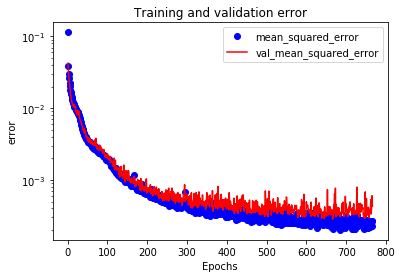

In [55]:
acc = history_dict['mean_squared_error']
val_acc = history_dict['val_mean_squared_error']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='mean_squared_error')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'r', label='val_mean_squared_error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.yscale('log')
plt.legend()

plt.show()

In [56]:
#now, let's test the performance of model 2

In [57]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justsol1.p'
file_name_y = 'Y_test_justsol1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [58]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.05023064 -0.66059884 -0.13647417 -0.99356736] [-9.77221131e-01 -3.99718933e-02 -3.52509135e-04 -5.39802526e-05
  2.22575002e-04  4.72626391e-04]
max for Y, X:  [ 0.65633652 -0.24603813  0.94158853  0.19412154] [ 9.86662770e-01 -3.99716951e-02 -3.52409321e-04 -5.38807062e-05
  2.22670742e-04  4.72725766e-04]


In [59]:
sort_index=np.argsort(test_data_x[:,0])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [60]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_2.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

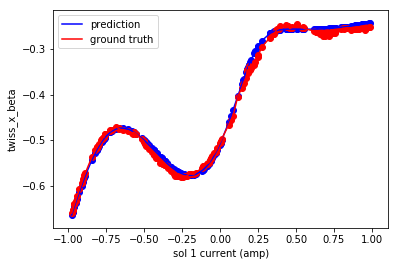

In [61]:
#now, we graph the result

#x_alpha

which_parameter_to_plot=1

x_axis=test_data_x[:,0]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('sol 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [62]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad4.p'
file_name_y = 'Y_test_justquad4.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [63]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.20493509 -0.52765214  0.18701863 -0.75480081] [ 1.70986132e-04 -3.99718939e-02 -5.00529291e-01 -5.39807049e-05
  2.22573685e-04 -9.80478841e-01]
max for Y, X:  [ 0.22871819 -0.34454687  0.73103692 -0.02952656] [ 1.71185628e-04 -3.99716949e-02 -5.00529281e-01 -5.39707447e-05
  2.22583536e-04  9.98432247e-01]


In [64]:
sort_index=np.argsort(test_data_x[:,5])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [65]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_2.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

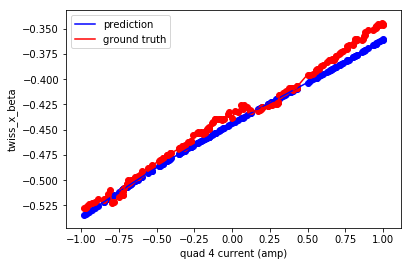

In [66]:
#now, we graph the result


which_parameter_to_plot=1

x_axis=test_data_x[:,5]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 4 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [67]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad1.p'
file_name_y = 'Y_test_justquad1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [68]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.2623439  -0.67689954  0.22886399 -0.75292571] [-1.79895899e-01 -3.99718943e-02 -9.67564791e-01 -5.39805878e-05
  2.22574874e-04  4.72626373e-04]
max for Y, X:  [ 0.53386497 -0.48101427  0.7992093  -0.1885591 ] [-1.79895700e-01 -3.99716951e-02  9.88009255e-01 -5.38811150e-05
  2.22673212e-04  4.72725885e-04]


In [69]:
sort_index=np.argsort(test_data_x[:,2])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [70]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_2.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

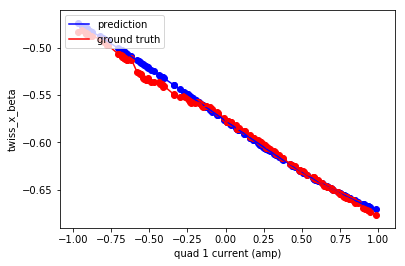

In [71]:
#now, we graph the result

which_parameter_to_plot=1

x_axis=test_data_x[:,2]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

# now, we are going to train model 3

In [72]:
model_3= Sequential()
model_3.add(Dense(16, activation='tanh', input_dim=len(features_list),activity_regularizer=l2(0.00)))
model_3.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_3.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_3.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_3.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_3.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_3.add(Dense(1, activation='linear',activity_regularizer=l2(0.00)))
model_3.compile(loss='mse',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [73]:
index=0
x_val = scaled_total_data_x[fold_list[index].val_index]
y_val = scaled_total_data_y3[fold_list[index].val_index]


history = model_3.fit(scaled_total_data_x[fold_list[index].train_index], scaled_total_data_y3[fold_list[index].train_index],
                      validation_data=(x_val, y_val),
                      epochs=10000,
                      verbose=2,
                      callbacks=[early_stop])

Train on 2430 samples, validate on 347 samples
Epoch 1/10000
 - 1s - loss: 0.1264 - mean_absolute_error: 0.2650 - mean_squared_error: 0.1264 - val_loss: 0.0898 - val_mean_absolute_error: 0.2240 - val_mean_squared_error: 0.0898
Epoch 2/10000
 - 0s - loss: 0.0804 - mean_absolute_error: 0.2167 - mean_squared_error: 0.0804 - val_loss: 0.0848 - val_mean_absolute_error: 0.2134 - val_mean_squared_error: 0.0848
Epoch 3/10000
 - 0s - loss: 0.0761 - mean_absolute_error: 0.2088 - mean_squared_error: 0.0761 - val_loss: 0.0827 - val_mean_absolute_error: 0.2132 - val_mean_squared_error: 0.0827
Epoch 4/10000
 - 0s - loss: 0.0732 - mean_absolute_error: 0.2062 - mean_squared_error: 0.0732 - val_loss: 0.0887 - val_mean_absolute_error: 0.2175 - val_mean_squared_error: 0.0887
Epoch 5/10000
 - 0s - loss: 0.0707 - mean_absolute_error: 0.1994 - mean_squared_error: 0.0707 - val_loss: 0.0733 - val_mean_absolute_error: 0.2025 - val_mean_squared_error: 0.0733
Epoch 6/10000
 - 0s - loss: 0.0664 - mean_absolute_er

 - 0s - loss: 0.0047 - mean_absolute_error: 0.0514 - mean_squared_error: 0.0047 - val_loss: 0.0041 - val_mean_absolute_error: 0.0485 - val_mean_squared_error: 0.0041
Epoch 47/10000
 - 0s - loss: 0.0047 - mean_absolute_error: 0.0506 - mean_squared_error: 0.0047 - val_loss: 0.0043 - val_mean_absolute_error: 0.0507 - val_mean_squared_error: 0.0043
Epoch 48/10000
 - 0s - loss: 0.0045 - mean_absolute_error: 0.0504 - mean_squared_error: 0.0045 - val_loss: 0.0050 - val_mean_absolute_error: 0.0563 - val_mean_squared_error: 0.0050
Epoch 49/10000
 - 0s - loss: 0.0044 - mean_absolute_error: 0.0493 - mean_squared_error: 0.0044 - val_loss: 0.0041 - val_mean_absolute_error: 0.0481 - val_mean_squared_error: 0.0041
Epoch 50/10000
 - 0s - loss: 0.0046 - mean_absolute_error: 0.0506 - mean_squared_error: 0.0046 - val_loss: 0.0046 - val_mean_absolute_error: 0.0521 - val_mean_squared_error: 0.0046
Epoch 51/10000
 - 0s - loss: 0.0044 - mean_absolute_error: 0.0494 - mean_squared_error: 0.0044 - val_loss: 0.0

Epoch 92/10000
 - 0s - loss: 0.0023 - mean_absolute_error: 0.0358 - mean_squared_error: 0.0023 - val_loss: 0.0023 - val_mean_absolute_error: 0.0360 - val_mean_squared_error: 0.0023
Epoch 93/10000
 - 0s - loss: 0.0022 - mean_absolute_error: 0.0345 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_absolute_error: 0.0353 - val_mean_squared_error: 0.0022
Epoch 94/10000
 - 0s - loss: 0.0023 - mean_absolute_error: 0.0354 - mean_squared_error: 0.0023 - val_loss: 0.0027 - val_mean_absolute_error: 0.0386 - val_mean_squared_error: 0.0027
Epoch 95/10000
 - 0s - loss: 0.0021 - mean_absolute_error: 0.0335 - mean_squared_error: 0.0021 - val_loss: 0.0022 - val_mean_absolute_error: 0.0345 - val_mean_squared_error: 0.0022
Epoch 96/10000
 - 0s - loss: 0.0022 - mean_absolute_error: 0.0355 - mean_squared_error: 0.0022 - val_loss: 0.0021 - val_mean_absolute_error: 0.0333 - val_mean_squared_error: 0.0021
Epoch 97/10000
 - 0s - loss: 0.0021 - mean_absolute_error: 0.0340 - mean_squared_error: 0.0021 

 - 0s - loss: 0.0015 - mean_absolute_error: 0.0290 - mean_squared_error: 0.0015 - val_loss: 0.0016 - val_mean_absolute_error: 0.0301 - val_mean_squared_error: 0.0016
Epoch 138/10000
 - 0s - loss: 0.0014 - mean_absolute_error: 0.0279 - mean_squared_error: 0.0014 - val_loss: 0.0016 - val_mean_absolute_error: 0.0305 - val_mean_squared_error: 0.0016
Epoch 139/10000
 - 0s - loss: 0.0015 - mean_absolute_error: 0.0286 - mean_squared_error: 0.0015 - val_loss: 0.0017 - val_mean_absolute_error: 0.0328 - val_mean_squared_error: 0.0017
Epoch 140/10000
 - 0s - loss: 0.0014 - mean_absolute_error: 0.0276 - mean_squared_error: 0.0014 - val_loss: 0.0015 - val_mean_absolute_error: 0.0283 - val_mean_squared_error: 0.0015
Epoch 141/10000
 - 0s - loss: 0.0017 - mean_absolute_error: 0.0313 - mean_squared_error: 0.0017 - val_loss: 0.0020 - val_mean_absolute_error: 0.0339 - val_mean_squared_error: 0.0020
Epoch 142/10000
 - 0s - loss: 0.0013 - mean_absolute_error: 0.0269 - mean_squared_error: 0.0013 - val_loss

Epoch 183/10000
 - 0s - loss: 0.0013 - mean_absolute_error: 0.0271 - mean_squared_error: 0.0013 - val_loss: 0.0018 - val_mean_absolute_error: 0.0310 - val_mean_squared_error: 0.0018
Epoch 184/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0247 - mean_squared_error: 0.0011 - val_loss: 0.0013 - val_mean_absolute_error: 0.0268 - val_mean_squared_error: 0.0013
Epoch 185/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0244 - mean_squared_error: 0.0011 - val_loss: 0.0012 - val_mean_absolute_error: 0.0264 - val_mean_squared_error: 0.0012
Epoch 186/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0246 - mean_squared_error: 0.0011 - val_loss: 0.0018 - val_mean_absolute_error: 0.0304 - val_mean_squared_error: 0.0018
Epoch 187/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0252 - mean_squared_error: 0.0011 - val_loss: 0.0013 - val_mean_absolute_error: 0.0268 - val_mean_squared_error: 0.0013
Epoch 188/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0240 - mean_squared_error: 0

Epoch 228/10000
 - 0s - loss: 9.4402e-04 - mean_absolute_error: 0.0229 - mean_squared_error: 9.4402e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0270 - val_mean_squared_error: 0.0012
Epoch 229/10000
 - 0s - loss: 9.7453e-04 - mean_absolute_error: 0.0230 - mean_squared_error: 9.7453e-04 - val_loss: 0.0014 - val_mean_absolute_error: 0.0282 - val_mean_squared_error: 0.0014
Epoch 230/10000
 - 0s - loss: 9.3105e-04 - mean_absolute_error: 0.0224 - mean_squared_error: 9.3105e-04 - val_loss: 0.0015 - val_mean_absolute_error: 0.0289 - val_mean_squared_error: 0.0015
Epoch 231/10000
 - 0s - loss: 9.3251e-04 - mean_absolute_error: 0.0224 - mean_squared_error: 9.3251e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0254 - val_mean_squared_error: 0.0011
Epoch 232/10000
 - 0s - loss: 9.2970e-04 - mean_absolute_error: 0.0227 - mean_squared_error: 9.2970e-04 - val_loss: 9.6322e-04 - val_mean_absolute_error: 0.0236 - val_mean_squared_error: 9.6322e-04
Epoch 233/10000
 - 0s - loss: 8.8199e-04 -

Epoch 271/10000
 - 0s - loss: 7.8297e-04 - mean_absolute_error: 0.0208 - mean_squared_error: 7.8297e-04 - val_loss: 8.8129e-04 - val_mean_absolute_error: 0.0226 - val_mean_squared_error: 8.8129e-04
Epoch 272/10000
 - 0s - loss: 0.0010 - mean_absolute_error: 0.0237 - mean_squared_error: 0.0010 - val_loss: 0.0011 - val_mean_absolute_error: 0.0251 - val_mean_squared_error: 0.0011
Epoch 273/10000
 - 0s - loss: 8.7512e-04 - mean_absolute_error: 0.0218 - mean_squared_error: 8.7512e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0258 - val_mean_squared_error: 0.0012
Epoch 274/10000
 - 0s - loss: 9.4467e-04 - mean_absolute_error: 0.0228 - mean_squared_error: 9.4467e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0272 - val_mean_squared_error: 0.0012
Epoch 275/10000
 - 0s - loss: 8.8216e-04 - mean_absolute_error: 0.0217 - mean_squared_error: 8.8216e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0256 - val_mean_squared_error: 0.0011
Epoch 276/10000
 - 0s - loss: 8.5751e-04 - mean_ab

Epoch 314/10000
 - 0s - loss: 7.1839e-04 - mean_absolute_error: 0.0195 - mean_squared_error: 7.1839e-04 - val_loss: 7.9191e-04 - val_mean_absolute_error: 0.0215 - val_mean_squared_error: 7.9191e-04
Epoch 315/10000
 - 0s - loss: 7.4754e-04 - mean_absolute_error: 0.0199 - mean_squared_error: 7.4754e-04 - val_loss: 8.3824e-04 - val_mean_absolute_error: 0.0218 - val_mean_squared_error: 8.3824e-04
Epoch 316/10000
 - 0s - loss: 8.0695e-04 - mean_absolute_error: 0.0210 - mean_squared_error: 8.0695e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0269 - val_mean_squared_error: 0.0012
Epoch 317/10000
 - 0s - loss: 7.2377e-04 - mean_absolute_error: 0.0198 - mean_squared_error: 7.2377e-04 - val_loss: 8.4574e-04 - val_mean_absolute_error: 0.0220 - val_mean_squared_error: 8.4574e-04
Epoch 318/10000
 - 0s - loss: 7.2266e-04 - mean_absolute_error: 0.0198 - mean_squared_error: 7.2266e-04 - val_loss: 8.1488e-04 - val_mean_absolute_error: 0.0218 - val_mean_squared_error: 8.1488e-04
Epoch 319/10000
 -

Epoch 356/10000
 - 0s - loss: 6.7501e-04 - mean_absolute_error: 0.0189 - mean_squared_error: 6.7501e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0241 - val_mean_squared_error: 0.0011
Epoch 357/10000
 - 0s - loss: 6.4677e-04 - mean_absolute_error: 0.0185 - mean_squared_error: 6.4677e-04 - val_loss: 6.9594e-04 - val_mean_absolute_error: 0.0202 - val_mean_squared_error: 6.9594e-04
Epoch 358/10000
 - 0s - loss: 7.4804e-04 - mean_absolute_error: 0.0207 - mean_squared_error: 7.4804e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0241 - val_mean_squared_error: 0.0010
Epoch 359/10000
 - 0s - loss: 6.6366e-04 - mean_absolute_error: 0.0191 - mean_squared_error: 6.6366e-04 - val_loss: 7.9202e-04 - val_mean_absolute_error: 0.0213 - val_mean_squared_error: 7.9202e-04
Epoch 360/10000
 - 0s - loss: 6.3605e-04 - mean_absolute_error: 0.0186 - mean_squared_error: 6.3605e-04 - val_loss: 8.3832e-04 - val_mean_absolute_error: 0.0222 - val_mean_squared_error: 8.3832e-04
Epoch 361/10000
 - 0s - lo

Epoch 398/10000
 - 0s - loss: 6.3433e-04 - mean_absolute_error: 0.0188 - mean_squared_error: 6.3433e-04 - val_loss: 6.6847e-04 - val_mean_absolute_error: 0.0198 - val_mean_squared_error: 6.6847e-04
Epoch 399/10000
 - 0s - loss: 5.7223e-04 - mean_absolute_error: 0.0177 - mean_squared_error: 5.7223e-04 - val_loss: 6.6089e-04 - val_mean_absolute_error: 0.0189 - val_mean_squared_error: 6.6089e-04
Epoch 400/10000
 - 0s - loss: 5.7151e-04 - mean_absolute_error: 0.0175 - mean_squared_error: 5.7151e-04 - val_loss: 8.1573e-04 - val_mean_absolute_error: 0.0204 - val_mean_squared_error: 8.1573e-04
Epoch 401/10000
 - 0s - loss: 6.8393e-04 - mean_absolute_error: 0.0193 - mean_squared_error: 6.8393e-04 - val_loss: 8.7926e-04 - val_mean_absolute_error: 0.0241 - val_mean_squared_error: 8.7926e-04
Epoch 402/10000
 - 0s - loss: 6.7116e-04 - mean_absolute_error: 0.0196 - mean_squared_error: 6.7116e-04 - val_loss: 7.9529e-04 - val_mean_absolute_error: 0.0214 - val_mean_squared_error: 7.9529e-04
Epoch 403/

Epoch 440/10000
 - 0s - loss: 5.1482e-04 - mean_absolute_error: 0.0167 - mean_squared_error: 5.1482e-04 - val_loss: 5.8435e-04 - val_mean_absolute_error: 0.0186 - val_mean_squared_error: 5.8435e-04
Epoch 441/10000
 - 0s - loss: 6.2725e-04 - mean_absolute_error: 0.0187 - mean_squared_error: 6.2725e-04 - val_loss: 7.0191e-04 - val_mean_absolute_error: 0.0202 - val_mean_squared_error: 7.0191e-04
Epoch 442/10000
 - 0s - loss: 5.7549e-04 - mean_absolute_error: 0.0179 - mean_squared_error: 5.7549e-04 - val_loss: 6.8291e-04 - val_mean_absolute_error: 0.0192 - val_mean_squared_error: 6.8291e-04
Epoch 443/10000
 - 0s - loss: 6.6044e-04 - mean_absolute_error: 0.0193 - mean_squared_error: 6.6044e-04 - val_loss: 6.2889e-04 - val_mean_absolute_error: 0.0187 - val_mean_squared_error: 6.2889e-04
Epoch 444/10000
 - 0s - loss: 5.9984e-04 - mean_absolute_error: 0.0182 - mean_squared_error: 5.9984e-04 - val_loss: 6.1550e-04 - val_mean_absolute_error: 0.0187 - val_mean_squared_error: 6.1550e-04
Epoch 445/

Epoch 482/10000
 - 0s - loss: 5.9317e-04 - mean_absolute_error: 0.0179 - mean_squared_error: 5.9317e-04 - val_loss: 9.9429e-04 - val_mean_absolute_error: 0.0240 - val_mean_squared_error: 9.9429e-04
Epoch 483/10000
 - 0s - loss: 4.7072e-04 - mean_absolute_error: 0.0160 - mean_squared_error: 4.7072e-04 - val_loss: 6.8398e-04 - val_mean_absolute_error: 0.0195 - val_mean_squared_error: 6.8398e-04
Epoch 484/10000
 - 0s - loss: 5.1312e-04 - mean_absolute_error: 0.0169 - mean_squared_error: 5.1312e-04 - val_loss: 6.2517e-04 - val_mean_absolute_error: 0.0191 - val_mean_squared_error: 6.2517e-04
Epoch 485/10000
 - 0s - loss: 5.6563e-04 - mean_absolute_error: 0.0176 - mean_squared_error: 5.6563e-04 - val_loss: 7.4993e-04 - val_mean_absolute_error: 0.0206 - val_mean_squared_error: 7.4993e-04
Epoch 486/10000
 - 0s - loss: 5.9134e-04 - mean_absolute_error: 0.0178 - mean_squared_error: 5.9134e-04 - val_loss: 7.9303e-04 - val_mean_absolute_error: 0.0209 - val_mean_squared_error: 7.9303e-04
Epoch 487/

Epoch 524/10000
 - 0s - loss: 4.1160e-04 - mean_absolute_error: 0.0150 - mean_squared_error: 4.1160e-04 - val_loss: 6.2479e-04 - val_mean_absolute_error: 0.0185 - val_mean_squared_error: 6.2479e-04
Epoch 525/10000
 - 0s - loss: 5.1294e-04 - mean_absolute_error: 0.0167 - mean_squared_error: 5.1294e-04 - val_loss: 5.9057e-04 - val_mean_absolute_error: 0.0184 - val_mean_squared_error: 5.9057e-04
Epoch 526/10000
 - 0s - loss: 4.9304e-04 - mean_absolute_error: 0.0167 - mean_squared_error: 4.9304e-04 - val_loss: 8.5511e-04 - val_mean_absolute_error: 0.0206 - val_mean_squared_error: 8.5511e-04
Epoch 527/10000
 - 0s - loss: 4.6479e-04 - mean_absolute_error: 0.0160 - mean_squared_error: 4.6479e-04 - val_loss: 9.2920e-04 - val_mean_absolute_error: 0.0229 - val_mean_squared_error: 9.2920e-04
Epoch 528/10000
 - 0s - loss: 5.0475e-04 - mean_absolute_error: 0.0168 - mean_squared_error: 5.0475e-04 - val_loss: 5.6827e-04 - val_mean_absolute_error: 0.0174 - val_mean_squared_error: 5.6827e-04
Epoch 529/

Epoch 566/10000
 - 0s - loss: 4.4101e-04 - mean_absolute_error: 0.0156 - mean_squared_error: 4.4101e-04 - val_loss: 5.2090e-04 - val_mean_absolute_error: 0.0166 - val_mean_squared_error: 5.2090e-04
Epoch 567/10000
 - 0s - loss: 4.6099e-04 - mean_absolute_error: 0.0158 - mean_squared_error: 4.6099e-04 - val_loss: 7.4575e-04 - val_mean_absolute_error: 0.0197 - val_mean_squared_error: 7.4575e-04
Epoch 568/10000
 - 0s - loss: 5.2796e-04 - mean_absolute_error: 0.0165 - mean_squared_error: 5.2796e-04 - val_loss: 6.0616e-04 - val_mean_absolute_error: 0.0179 - val_mean_squared_error: 6.0616e-04
Epoch 569/10000
 - 0s - loss: 4.1390e-04 - mean_absolute_error: 0.0150 - mean_squared_error: 4.1390e-04 - val_loss: 6.2010e-04 - val_mean_absolute_error: 0.0181 - val_mean_squared_error: 6.2010e-04
Epoch 570/10000
 - 0s - loss: 5.0472e-04 - mean_absolute_error: 0.0163 - mean_squared_error: 5.0472e-04 - val_loss: 7.0313e-04 - val_mean_absolute_error: 0.0213 - val_mean_squared_error: 7.0313e-04
Epoch 571/

Epoch 608/10000
 - 0s - loss: 4.2706e-04 - mean_absolute_error: 0.0154 - mean_squared_error: 4.2706e-04 - val_loss: 5.3030e-04 - val_mean_absolute_error: 0.0169 - val_mean_squared_error: 5.3030e-04
Epoch 609/10000
 - 0s - loss: 4.3803e-04 - mean_absolute_error: 0.0155 - mean_squared_error: 4.3803e-04 - val_loss: 4.4652e-04 - val_mean_absolute_error: 0.0155 - val_mean_squared_error: 4.4652e-04
Epoch 610/10000
 - 0s - loss: 3.4430e-04 - mean_absolute_error: 0.0136 - mean_squared_error: 3.4430e-04 - val_loss: 4.9153e-04 - val_mean_absolute_error: 0.0168 - val_mean_squared_error: 4.9153e-04
Epoch 611/10000
 - 0s - loss: 4.3561e-04 - mean_absolute_error: 0.0156 - mean_squared_error: 4.3561e-04 - val_loss: 4.4886e-04 - val_mean_absolute_error: 0.0154 - val_mean_squared_error: 4.4886e-04
Epoch 612/10000
 - 0s - loss: 4.2278e-04 - mean_absolute_error: 0.0153 - mean_squared_error: 4.2278e-04 - val_loss: 5.2508e-04 - val_mean_absolute_error: 0.0165 - val_mean_squared_error: 5.2508e-04
Epoch 613/

Epoch 650/10000
 - 0s - loss: 4.0107e-04 - mean_absolute_error: 0.0149 - mean_squared_error: 4.0107e-04 - val_loss: 4.1767e-04 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 4.1767e-04
Epoch 651/10000
 - 0s - loss: 3.8465e-04 - mean_absolute_error: 0.0146 - mean_squared_error: 3.8465e-04 - val_loss: 4.4118e-04 - val_mean_absolute_error: 0.0159 - val_mean_squared_error: 4.4118e-04
Epoch 652/10000
 - 0s - loss: 3.7912e-04 - mean_absolute_error: 0.0144 - mean_squared_error: 3.7912e-04 - val_loss: 4.4463e-04 - val_mean_absolute_error: 0.0155 - val_mean_squared_error: 4.4463e-04
Epoch 653/10000
 - 0s - loss: 3.5758e-04 - mean_absolute_error: 0.0142 - mean_squared_error: 3.5758e-04 - val_loss: 5.3575e-04 - val_mean_absolute_error: 0.0163 - val_mean_squared_error: 5.3575e-04
Epoch 654/10000
 - 0s - loss: 3.9217e-04 - mean_absolute_error: 0.0144 - mean_squared_error: 3.9217e-04 - val_loss: 4.7692e-04 - val_mean_absolute_error: 0.0170 - val_mean_squared_error: 4.7692e-04
Epoch 655/

Epoch 692/10000
 - 0s - loss: 3.6785e-04 - mean_absolute_error: 0.0140 - mean_squared_error: 3.6785e-04 - val_loss: 3.9187e-04 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 3.9187e-04
Epoch 693/10000
 - 0s - loss: 3.3288e-04 - mean_absolute_error: 0.0137 - mean_squared_error: 3.3288e-04 - val_loss: 4.1722e-04 - val_mean_absolute_error: 0.0147 - val_mean_squared_error: 4.1722e-04
Epoch 694/10000
 - 0s - loss: 3.4576e-04 - mean_absolute_error: 0.0136 - mean_squared_error: 3.4576e-04 - val_loss: 4.2363e-04 - val_mean_absolute_error: 0.0150 - val_mean_squared_error: 4.2363e-04
Epoch 695/10000
 - 0s - loss: 3.7110e-04 - mean_absolute_error: 0.0144 - mean_squared_error: 3.7110e-04 - val_loss: 4.1804e-04 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 4.1804e-04
Epoch 696/10000
 - 0s - loss: 3.5804e-04 - mean_absolute_error: 0.0139 - mean_squared_error: 3.5804e-04 - val_loss: 4.5080e-04 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 4.5080e-04
Epoch 697/

Epoch 734/10000
 - 0s - loss: 4.4933e-04 - mean_absolute_error: 0.0153 - mean_squared_error: 4.4933e-04 - val_loss: 7.2225e-04 - val_mean_absolute_error: 0.0210 - val_mean_squared_error: 7.2225e-04
Epoch 735/10000
 - 0s - loss: 4.2517e-04 - mean_absolute_error: 0.0150 - mean_squared_error: 4.2517e-04 - val_loss: 5.6939e-04 - val_mean_absolute_error: 0.0170 - val_mean_squared_error: 5.6939e-04
Epoch 736/10000
 - 0s - loss: 3.1271e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.1271e-04 - val_loss: 4.1101e-04 - val_mean_absolute_error: 0.0142 - val_mean_squared_error: 4.1101e-04
Epoch 737/10000
 - 0s - loss: 2.8825e-04 - mean_absolute_error: 0.0126 - mean_squared_error: 2.8825e-04 - val_loss: 3.8699e-04 - val_mean_absolute_error: 0.0134 - val_mean_squared_error: 3.8699e-04
Epoch 738/10000
 - 0s - loss: 3.9316e-04 - mean_absolute_error: 0.0142 - mean_squared_error: 3.9316e-04 - val_loss: 5.1343e-04 - val_mean_absolute_error: 0.0161 - val_mean_squared_error: 5.1343e-04
Epoch 739/

Epoch 776/10000
 - 0s - loss: 3.9146e-04 - mean_absolute_error: 0.0146 - mean_squared_error: 3.9146e-04 - val_loss: 3.9773e-04 - val_mean_absolute_error: 0.0142 - val_mean_squared_error: 3.9773e-04
Epoch 777/10000
 - 0s - loss: 3.3697e-04 - mean_absolute_error: 0.0136 - mean_squared_error: 3.3697e-04 - val_loss: 4.1872e-04 - val_mean_absolute_error: 0.0139 - val_mean_squared_error: 4.1872e-04
Epoch 778/10000
 - 0s - loss: 3.2438e-04 - mean_absolute_error: 0.0136 - mean_squared_error: 3.2438e-04 - val_loss: 4.3006e-04 - val_mean_absolute_error: 0.0150 - val_mean_squared_error: 4.3006e-04
Epoch 779/10000
 - 0s - loss: 3.7336e-04 - mean_absolute_error: 0.0142 - mean_squared_error: 3.7336e-04 - val_loss: 7.5365e-04 - val_mean_absolute_error: 0.0195 - val_mean_squared_error: 7.5365e-04
Epoch 780/10000
 - 0s - loss: 2.9797e-04 - mean_absolute_error: 0.0128 - mean_squared_error: 2.9797e-04 - val_loss: 4.2410e-04 - val_mean_absolute_error: 0.0148 - val_mean_squared_error: 4.2410e-04
Epoch 781/

Epoch 818/10000
 - 0s - loss: 3.2001e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.2001e-04 - val_loss: 4.0863e-04 - val_mean_absolute_error: 0.0140 - val_mean_squared_error: 4.0863e-04
Epoch 819/10000
 - 0s - loss: 3.0339e-04 - mean_absolute_error: 0.0132 - mean_squared_error: 3.0339e-04 - val_loss: 4.4938e-04 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 4.4938e-04
Epoch 820/10000
 - 0s - loss: 3.1248e-04 - mean_absolute_error: 0.0129 - mean_squared_error: 3.1248e-04 - val_loss: 4.8343e-04 - val_mean_absolute_error: 0.0153 - val_mean_squared_error: 4.8343e-04
Epoch 821/10000
 - 0s - loss: 3.4850e-04 - mean_absolute_error: 0.0137 - mean_squared_error: 3.4850e-04 - val_loss: 4.3032e-04 - val_mean_absolute_error: 0.0153 - val_mean_squared_error: 4.3032e-04
Epoch 822/10000
 - 0s - loss: 4.4741e-04 - mean_absolute_error: 0.0155 - mean_squared_error: 4.4741e-04 - val_loss: 4.2574e-04 - val_mean_absolute_error: 0.0154 - val_mean_squared_error: 4.2574e-04
Epoch 823/

Epoch 860/10000
 - 0s - loss: 3.0394e-04 - mean_absolute_error: 0.0129 - mean_squared_error: 3.0394e-04 - val_loss: 4.5441e-04 - val_mean_absolute_error: 0.0155 - val_mean_squared_error: 4.5441e-04
Epoch 861/10000
 - 0s - loss: 3.0469e-04 - mean_absolute_error: 0.0130 - mean_squared_error: 3.0469e-04 - val_loss: 4.2807e-04 - val_mean_absolute_error: 0.0143 - val_mean_squared_error: 4.2807e-04
Epoch 862/10000
 - 0s - loss: 2.6771e-04 - mean_absolute_error: 0.0122 - mean_squared_error: 2.6771e-04 - val_loss: 4.1358e-04 - val_mean_absolute_error: 0.0147 - val_mean_squared_error: 4.1358e-04
Epoch 863/10000
 - 0s - loss: 3.7510e-04 - mean_absolute_error: 0.0140 - mean_squared_error: 3.7510e-04 - val_loss: 4.1451e-04 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 4.1451e-04
Epoch 864/10000
 - 0s - loss: 3.7563e-04 - mean_absolute_error: 0.0146 - mean_squared_error: 3.7563e-04 - val_loss: 6.7709e-04 - val_mean_absolute_error: 0.0201 - val_mean_squared_error: 6.7709e-04
Epoch 865/

Epoch 902/10000
 - 0s - loss: 2.8234e-04 - mean_absolute_error: 0.0125 - mean_squared_error: 2.8234e-04 - val_loss: 4.5702e-04 - val_mean_absolute_error: 0.0144 - val_mean_squared_error: 4.5702e-04
Epoch 903/10000
 - 0s - loss: 3.3182e-04 - mean_absolute_error: 0.0137 - mean_squared_error: 3.3182e-04 - val_loss: 3.8768e-04 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 3.8768e-04
Epoch 904/10000
 - 0s - loss: 3.0047e-04 - mean_absolute_error: 0.0129 - mean_squared_error: 3.0047e-04 - val_loss: 4.6134e-04 - val_mean_absolute_error: 0.0155 - val_mean_squared_error: 4.6134e-04
Epoch 905/10000
 - 0s - loss: 3.1547e-04 - mean_absolute_error: 0.0129 - mean_squared_error: 3.1547e-04 - val_loss: 6.0244e-04 - val_mean_absolute_error: 0.0182 - val_mean_squared_error: 6.0244e-04
Epoch 906/10000
 - 0s - loss: 4.0861e-04 - mean_absolute_error: 0.0147 - mean_squared_error: 4.0861e-04 - val_loss: 6.2808e-04 - val_mean_absolute_error: 0.0172 - val_mean_squared_error: 6.2808e-04
Epoch 907/

Epoch 944/10000
 - 0s - loss: 2.9268e-04 - mean_absolute_error: 0.0125 - mean_squared_error: 2.9268e-04 - val_loss: 3.9727e-04 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 3.9727e-04
Epoch 945/10000
 - 0s - loss: 2.8732e-04 - mean_absolute_error: 0.0127 - mean_squared_error: 2.8732e-04 - val_loss: 4.6105e-04 - val_mean_absolute_error: 0.0147 - val_mean_squared_error: 4.6105e-04
Epoch 946/10000
 - 0s - loss: 2.6411e-04 - mean_absolute_error: 0.0122 - mean_squared_error: 2.6411e-04 - val_loss: 5.8575e-04 - val_mean_absolute_error: 0.0176 - val_mean_squared_error: 5.8575e-04
Epoch 947/10000
 - 0s - loss: 3.4472e-04 - mean_absolute_error: 0.0137 - mean_squared_error: 3.4472e-04 - val_loss: 3.1601e-04 - val_mean_absolute_error: 0.0127 - val_mean_squared_error: 3.1601e-04
Epoch 948/10000
 - 0s - loss: 2.6824e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.6824e-04 - val_loss: 4.2737e-04 - val_mean_absolute_error: 0.0142 - val_mean_squared_error: 4.2737e-04
Epoch 949/

Epoch 986/10000
 - 0s - loss: 3.1312e-04 - mean_absolute_error: 0.0129 - mean_squared_error: 3.1312e-04 - val_loss: 5.3842e-04 - val_mean_absolute_error: 0.0165 - val_mean_squared_error: 5.3842e-04
Epoch 987/10000
 - 0s - loss: 3.4853e-04 - mean_absolute_error: 0.0136 - mean_squared_error: 3.4853e-04 - val_loss: 4.0668e-04 - val_mean_absolute_error: 0.0151 - val_mean_squared_error: 4.0668e-04
Epoch 988/10000
 - 0s - loss: 2.8579e-04 - mean_absolute_error: 0.0127 - mean_squared_error: 2.8579e-04 - val_loss: 3.9779e-04 - val_mean_absolute_error: 0.0142 - val_mean_squared_error: 3.9779e-04
Epoch 989/10000
 - 0s - loss: 4.5588e-04 - mean_absolute_error: 0.0157 - mean_squared_error: 4.5588e-04 - val_loss: 4.9328e-04 - val_mean_absolute_error: 0.0153 - val_mean_squared_error: 4.9328e-04
Epoch 990/10000
 - 0s - loss: 2.6723e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.6723e-04 - val_loss: 4.4646e-04 - val_mean_absolute_error: 0.0155 - val_mean_squared_error: 4.4646e-04
Epoch 991/

Epoch 1028/10000
 - 0s - loss: 2.7738e-04 - mean_absolute_error: 0.0126 - mean_squared_error: 2.7738e-04 - val_loss: 4.8237e-04 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 4.8237e-04
Epoch 1029/10000
 - 0s - loss: 2.9852e-04 - mean_absolute_error: 0.0126 - mean_squared_error: 2.9852e-04 - val_loss: 4.2731e-04 - val_mean_absolute_error: 0.0144 - val_mean_squared_error: 4.2731e-04
Epoch 1030/10000
 - 0s - loss: 2.6257e-04 - mean_absolute_error: 0.0119 - mean_squared_error: 2.6257e-04 - val_loss: 5.8598e-04 - val_mean_absolute_error: 0.0162 - val_mean_squared_error: 5.8598e-04
Epoch 1031/10000
 - 0s - loss: 2.8527e-04 - mean_absolute_error: 0.0124 - mean_squared_error: 2.8527e-04 - val_loss: 7.0951e-04 - val_mean_absolute_error: 0.0176 - val_mean_squared_error: 7.0951e-04
Epoch 1032/10000
 - 0s - loss: 4.4960e-04 - mean_absolute_error: 0.0152 - mean_squared_error: 4.4960e-04 - val_loss: 6.1650e-04 - val_mean_absolute_error: 0.0177 - val_mean_squared_error: 6.1650e-04
Epoch

In [74]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

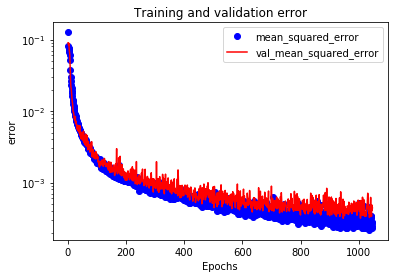

In [75]:
acc = history_dict['mean_squared_error']
val_acc = history_dict['val_mean_squared_error']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='mean_squared_error')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'r', label='val_mean_squared_error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.yscale('log')
plt.legend()

plt.show()

In [76]:
#now, let's test the performance of model 3

In [77]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justsol1.p'
file_name_y = 'Y_test_justsol1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [78]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.05023064 -0.66059884 -0.13647417 -0.99356736] [-9.77221131e-01 -3.99718933e-02 -3.52509135e-04 -5.39802526e-05
  2.22575002e-04  4.72626391e-04]
max for Y, X:  [ 0.65633652 -0.24603813  0.94158853  0.19412154] [ 9.86662770e-01 -3.99716951e-02 -3.52409321e-04 -5.38807062e-05
  2.22670742e-04  4.72725766e-04]


In [79]:
sort_index=np.argsort(test_data_x[:,0])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [80]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_3.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

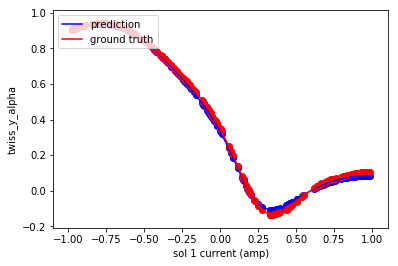

In [81]:
#now, we graph the result

which_parameter_to_plot=2

x_axis=test_data_x[:,0]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('sol 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [82]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad4.p'
file_name_y = 'Y_test_justquad4.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [83]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.20493509 -0.52765214  0.18701863 -0.75480081] [ 1.70986132e-04 -3.99718939e-02 -5.00529291e-01 -5.39807049e-05
  2.22573685e-04 -9.80478841e-01]
max for Y, X:  [ 0.22871819 -0.34454687  0.73103692 -0.02952656] [ 1.71185628e-04 -3.99716949e-02 -5.00529281e-01 -5.39707447e-05
  2.22583536e-04  9.98432247e-01]


In [84]:
sort_index=np.argsort(test_data_x[:,5])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [85]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_3.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

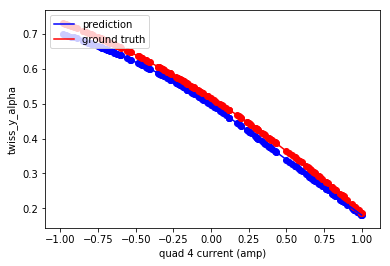

In [86]:
#now, we graph the result

which_parameter_to_plot=2

x_axis=test_data_x[:,5]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 4 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [87]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad1.p'
file_name_y = 'Y_test_justquad1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [88]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.2623439  -0.67689954  0.22886399 -0.75292571] [-1.79895899e-01 -3.99718943e-02 -9.67564791e-01 -5.39805878e-05
  2.22574874e-04  4.72626373e-04]
max for Y, X:  [ 0.53386497 -0.48101427  0.7992093  -0.1885591 ] [-1.79895700e-01 -3.99716951e-02  9.88009255e-01 -5.38811150e-05
  2.22673212e-04  4.72725885e-04]


In [89]:
sort_index=np.argsort(test_data_x[:,2])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [90]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_3.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

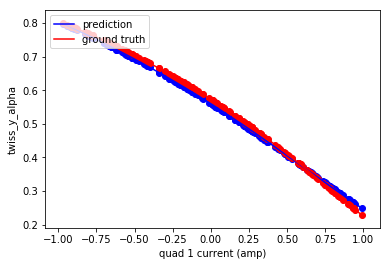

In [91]:
#now, we graph the result

which_parameter_to_plot=2

x_axis=test_data_x[:,2]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

# now, we are going to do model 4

In [92]:
model_4= Sequential()
model_4.add(Dense(16, activation='tanh', input_dim=len(features_list),activity_regularizer=l2(0.00)))
model_4.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_4.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_4.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_4.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_4.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_4.add(Dense(1, activation='linear',activity_regularizer=l2(0.00)))
model_4.compile(loss='mse',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [93]:
index=0
x_val = scaled_total_data_x[fold_list[index].val_index]
y_val = scaled_total_data_y4[fold_list[index].val_index]


history = model_4.fit(scaled_total_data_x[fold_list[index].train_index], scaled_total_data_y4[fold_list[index].train_index],
                      validation_data=(x_val, y_val),
                      epochs=10000,
                      verbose=2,
                      callbacks=[early_stop])

Train on 2430 samples, validate on 347 samples
Epoch 1/10000
 - 1s - loss: 0.1659 - mean_absolute_error: 0.3133 - mean_squared_error: 0.1659 - val_loss: 0.1220 - val_mean_absolute_error: 0.2669 - val_mean_squared_error: 0.1220
Epoch 2/10000
 - 0s - loss: 0.1044 - mean_absolute_error: 0.2467 - mean_squared_error: 0.1044 - val_loss: 0.1161 - val_mean_absolute_error: 0.2639 - val_mean_squared_error: 0.1161
Epoch 3/10000
 - 0s - loss: 0.0986 - mean_absolute_error: 0.2383 - mean_squared_error: 0.0986 - val_loss: 0.1131 - val_mean_absolute_error: 0.2465 - val_mean_squared_error: 0.1131
Epoch 4/10000
 - 0s - loss: 0.0919 - mean_absolute_error: 0.2274 - mean_squared_error: 0.0919 - val_loss: 0.1008 - val_mean_absolute_error: 0.2362 - val_mean_squared_error: 0.1008
Epoch 5/10000
 - 0s - loss: 0.0885 - mean_absolute_error: 0.2233 - mean_squared_error: 0.0885 - val_loss: 0.0970 - val_mean_absolute_error: 0.2332 - val_mean_squared_error: 0.0970
Epoch 6/10000
 - 0s - loss: 0.0859 - mean_absolute_er

 - 0s - loss: 0.0056 - mean_absolute_error: 0.0555 - mean_squared_error: 0.0056 - val_loss: 0.0053 - val_mean_absolute_error: 0.0574 - val_mean_squared_error: 0.0053
Epoch 47/10000
 - 0s - loss: 0.0053 - mean_absolute_error: 0.0538 - mean_squared_error: 0.0053 - val_loss: 0.0047 - val_mean_absolute_error: 0.0531 - val_mean_squared_error: 0.0047
Epoch 48/10000
 - 0s - loss: 0.0053 - mean_absolute_error: 0.0541 - mean_squared_error: 0.0053 - val_loss: 0.0050 - val_mean_absolute_error: 0.0546 - val_mean_squared_error: 0.0050
Epoch 49/10000
 - 0s - loss: 0.0050 - mean_absolute_error: 0.0525 - mean_squared_error: 0.0050 - val_loss: 0.0045 - val_mean_absolute_error: 0.0523 - val_mean_squared_error: 0.0045
Epoch 50/10000
 - 0s - loss: 0.0048 - mean_absolute_error: 0.0508 - mean_squared_error: 0.0048 - val_loss: 0.0043 - val_mean_absolute_error: 0.0511 - val_mean_squared_error: 0.0043
Epoch 51/10000
 - 0s - loss: 0.0049 - mean_absolute_error: 0.0519 - mean_squared_error: 0.0049 - val_loss: 0.0

Epoch 92/10000
 - 0s - loss: 0.0024 - mean_absolute_error: 0.0352 - mean_squared_error: 0.0024 - val_loss: 0.0024 - val_mean_absolute_error: 0.0354 - val_mean_squared_error: 0.0024
Epoch 93/10000
 - 0s - loss: 0.0024 - mean_absolute_error: 0.0355 - mean_squared_error: 0.0024 - val_loss: 0.0025 - val_mean_absolute_error: 0.0370 - val_mean_squared_error: 0.0025
Epoch 94/10000
 - 0s - loss: 0.0024 - mean_absolute_error: 0.0351 - mean_squared_error: 0.0024 - val_loss: 0.0022 - val_mean_absolute_error: 0.0349 - val_mean_squared_error: 0.0022
Epoch 95/10000
 - 0s - loss: 0.0024 - mean_absolute_error: 0.0359 - mean_squared_error: 0.0024 - val_loss: 0.0025 - val_mean_absolute_error: 0.0367 - val_mean_squared_error: 0.0025
Epoch 96/10000
 - 0s - loss: 0.0024 - mean_absolute_error: 0.0351 - mean_squared_error: 0.0024 - val_loss: 0.0027 - val_mean_absolute_error: 0.0396 - val_mean_squared_error: 0.0027
Epoch 97/10000
 - 0s - loss: 0.0022 - mean_absolute_error: 0.0343 - mean_squared_error: 0.0022 

 - 0s - loss: 0.0016 - mean_absolute_error: 0.0289 - mean_squared_error: 0.0016 - val_loss: 0.0013 - val_mean_absolute_error: 0.0259 - val_mean_squared_error: 0.0013
Epoch 138/10000
 - 0s - loss: 0.0015 - mean_absolute_error: 0.0274 - mean_squared_error: 0.0015 - val_loss: 0.0017 - val_mean_absolute_error: 0.0307 - val_mean_squared_error: 0.0017
Epoch 139/10000
 - 0s - loss: 0.0017 - mean_absolute_error: 0.0299 - mean_squared_error: 0.0017 - val_loss: 0.0019 - val_mean_absolute_error: 0.0321 - val_mean_squared_error: 0.0019
Epoch 140/10000
 - 0s - loss: 0.0014 - mean_absolute_error: 0.0270 - mean_squared_error: 0.0014 - val_loss: 0.0015 - val_mean_absolute_error: 0.0275 - val_mean_squared_error: 0.0015
Epoch 141/10000
 - 0s - loss: 0.0014 - mean_absolute_error: 0.0273 - mean_squared_error: 0.0014 - val_loss: 0.0021 - val_mean_absolute_error: 0.0340 - val_mean_squared_error: 0.0021
Epoch 142/10000
 - 0s - loss: 0.0015 - mean_absolute_error: 0.0280 - mean_squared_error: 0.0015 - val_loss

Epoch 183/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0244 - mean_squared_error: 0.0011 - val_loss: 0.0011 - val_mean_absolute_error: 0.0246 - val_mean_squared_error: 0.0011
Epoch 184/10000
 - 0s - loss: 0.0012 - mean_absolute_error: 0.0250 - mean_squared_error: 0.0012 - val_loss: 0.0017 - val_mean_absolute_error: 0.0324 - val_mean_squared_error: 0.0017
Epoch 185/10000
 - 0s - loss: 0.0012 - mean_absolute_error: 0.0249 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_absolute_error: 0.0248 - val_mean_squared_error: 0.0012
Epoch 186/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0237 - mean_squared_error: 0.0011 - val_loss: 0.0013 - val_mean_absolute_error: 0.0268 - val_mean_squared_error: 0.0013
Epoch 187/10000
 - 0s - loss: 0.0012 - mean_absolute_error: 0.0247 - mean_squared_error: 0.0012 - val_loss: 0.0013 - val_mean_absolute_error: 0.0276 - val_mean_squared_error: 0.0013
Epoch 188/10000
 - 0s - loss: 0.0012 - mean_absolute_error: 0.0250 - mean_squared_error: 0

Epoch 228/10000
 - 0s - loss: 0.0010 - mean_absolute_error: 0.0231 - mean_squared_error: 0.0010 - val_loss: 0.0018 - val_mean_absolute_error: 0.0332 - val_mean_squared_error: 0.0018
Epoch 229/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0241 - mean_squared_error: 0.0011 - val_loss: 0.0013 - val_mean_absolute_error: 0.0275 - val_mean_squared_error: 0.0013
Epoch 230/10000
 - 0s - loss: 0.0010 - mean_absolute_error: 0.0230 - mean_squared_error: 0.0010 - val_loss: 0.0010 - val_mean_absolute_error: 0.0237 - val_mean_squared_error: 0.0010
Epoch 231/10000
 - 0s - loss: 9.8737e-04 - mean_absolute_error: 0.0229 - mean_squared_error: 9.8737e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0236 - val_mean_squared_error: 0.0010
Epoch 232/10000
 - 0s - loss: 9.9261e-04 - mean_absolute_error: 0.0229 - mean_squared_error: 9.9261e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0231 - val_mean_squared_error: 0.0010
Epoch 233/10000
 - 0s - loss: 9.0810e-04 - mean_absolute_error: 0.0216 - m

Epoch 271/10000
 - 0s - loss: 8.9857e-04 - mean_absolute_error: 0.0218 - mean_squared_error: 8.9857e-04 - val_loss: 7.3870e-04 - val_mean_absolute_error: 0.0198 - val_mean_squared_error: 7.3870e-04
Epoch 272/10000
 - 0s - loss: 8.3585e-04 - mean_absolute_error: 0.0213 - mean_squared_error: 8.3585e-04 - val_loss: 8.6191e-04 - val_mean_absolute_error: 0.0219 - val_mean_squared_error: 8.6191e-04
Epoch 273/10000
 - 0s - loss: 7.9058e-04 - mean_absolute_error: 0.0202 - mean_squared_error: 7.9058e-04 - val_loss: 8.5753e-04 - val_mean_absolute_error: 0.0215 - val_mean_squared_error: 8.5753e-04
Epoch 274/10000
 - 0s - loss: 9.2610e-04 - mean_absolute_error: 0.0222 - mean_squared_error: 9.2610e-04 - val_loss: 8.9471e-04 - val_mean_absolute_error: 0.0223 - val_mean_squared_error: 8.9471e-04
Epoch 275/10000
 - 0s - loss: 7.5703e-04 - mean_absolute_error: 0.0199 - mean_squared_error: 7.5703e-04 - val_loss: 8.2335e-04 - val_mean_absolute_error: 0.0208 - val_mean_squared_error: 8.2335e-04
Epoch 276/

Epoch 313/10000
 - 0s - loss: 7.3091e-04 - mean_absolute_error: 0.0197 - mean_squared_error: 7.3091e-04 - val_loss: 8.7623e-04 - val_mean_absolute_error: 0.0220 - val_mean_squared_error: 8.7623e-04
Epoch 314/10000
 - 0s - loss: 8.6358e-04 - mean_absolute_error: 0.0216 - mean_squared_error: 8.6358e-04 - val_loss: 8.4365e-04 - val_mean_absolute_error: 0.0219 - val_mean_squared_error: 8.4365e-04
Epoch 315/10000
 - 0s - loss: 8.2089e-04 - mean_absolute_error: 0.0210 - mean_squared_error: 8.2089e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0263 - val_mean_squared_error: 0.0012
Epoch 316/10000
 - 0s - loss: 7.1436e-04 - mean_absolute_error: 0.0194 - mean_squared_error: 7.1436e-04 - val_loss: 8.7527e-04 - val_mean_absolute_error: 0.0221 - val_mean_squared_error: 8.7527e-04
Epoch 317/10000
 - 0s - loss: 7.5278e-04 - mean_absolute_error: 0.0203 - mean_squared_error: 7.5278e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0253 - val_mean_squared_error: 0.0011
Epoch 318/10000
 - 0s - lo

Epoch 355/10000
 - 0s - loss: 5.6187e-04 - mean_absolute_error: 0.0172 - mean_squared_error: 5.6187e-04 - val_loss: 7.8324e-04 - val_mean_absolute_error: 0.0202 - val_mean_squared_error: 7.8324e-04
Epoch 356/10000
 - 0s - loss: 7.3823e-04 - mean_absolute_error: 0.0200 - mean_squared_error: 7.3823e-04 - val_loss: 7.7930e-04 - val_mean_absolute_error: 0.0202 - val_mean_squared_error: 7.7930e-04
Epoch 357/10000
 - 0s - loss: 6.1485e-04 - mean_absolute_error: 0.0181 - mean_squared_error: 6.1485e-04 - val_loss: 6.3165e-04 - val_mean_absolute_error: 0.0186 - val_mean_squared_error: 6.3165e-04
Epoch 358/10000
 - 0s - loss: 5.6844e-04 - mean_absolute_error: 0.0173 - mean_squared_error: 5.6844e-04 - val_loss: 6.9804e-04 - val_mean_absolute_error: 0.0196 - val_mean_squared_error: 6.9804e-04
Epoch 359/10000
 - 0s - loss: 5.2862e-04 - mean_absolute_error: 0.0168 - mean_squared_error: 5.2862e-04 - val_loss: 7.3479e-04 - val_mean_absolute_error: 0.0191 - val_mean_squared_error: 7.3479e-04
Epoch 360/

Epoch 397/10000
 - 0s - loss: 5.3728e-04 - mean_absolute_error: 0.0168 - mean_squared_error: 5.3728e-04 - val_loss: 7.2531e-04 - val_mean_absolute_error: 0.0206 - val_mean_squared_error: 7.2531e-04
Epoch 398/10000
 - 0s - loss: 5.7248e-04 - mean_absolute_error: 0.0173 - mean_squared_error: 5.7248e-04 - val_loss: 8.4889e-04 - val_mean_absolute_error: 0.0221 - val_mean_squared_error: 8.4889e-04
Epoch 399/10000
 - 0s - loss: 5.3230e-04 - mean_absolute_error: 0.0168 - mean_squared_error: 5.3230e-04 - val_loss: 5.2019e-04 - val_mean_absolute_error: 0.0165 - val_mean_squared_error: 5.2019e-04
Epoch 400/10000
 - 0s - loss: 5.8165e-04 - mean_absolute_error: 0.0178 - mean_squared_error: 5.8165e-04 - val_loss: 5.3194e-04 - val_mean_absolute_error: 0.0167 - val_mean_squared_error: 5.3194e-04
Epoch 401/10000
 - 0s - loss: 7.2905e-04 - mean_absolute_error: 0.0198 - mean_squared_error: 7.2905e-04 - val_loss: 8.0805e-04 - val_mean_absolute_error: 0.0220 - val_mean_squared_error: 8.0805e-04
Epoch 402/

Epoch 439/10000
 - 0s - loss: 5.3970e-04 - mean_absolute_error: 0.0169 - mean_squared_error: 5.3970e-04 - val_loss: 7.0316e-04 - val_mean_absolute_error: 0.0199 - val_mean_squared_error: 7.0316e-04
Epoch 440/10000
 - 0s - loss: 7.9685e-04 - mean_absolute_error: 0.0204 - mean_squared_error: 7.9685e-04 - val_loss: 9.4551e-04 - val_mean_absolute_error: 0.0229 - val_mean_squared_error: 9.4551e-04
Epoch 441/10000
 - 0s - loss: 5.9403e-04 - mean_absolute_error: 0.0181 - mean_squared_error: 5.9403e-04 - val_loss: 5.2039e-04 - val_mean_absolute_error: 0.0162 - val_mean_squared_error: 5.2039e-04
Epoch 442/10000
 - 0s - loss: 5.7113e-04 - mean_absolute_error: 0.0176 - mean_squared_error: 5.7113e-04 - val_loss: 6.0815e-04 - val_mean_absolute_error: 0.0173 - val_mean_squared_error: 6.0815e-04
Epoch 443/10000
 - 0s - loss: 5.1012e-04 - mean_absolute_error: 0.0166 - mean_squared_error: 5.1012e-04 - val_loss: 4.6308e-04 - val_mean_absolute_error: 0.0155 - val_mean_squared_error: 4.6308e-04
Epoch 444/

Epoch 481/10000
 - 0s - loss: 4.3745e-04 - mean_absolute_error: 0.0153 - mean_squared_error: 4.3745e-04 - val_loss: 6.1199e-04 - val_mean_absolute_error: 0.0179 - val_mean_squared_error: 6.1199e-04
Epoch 482/10000
 - 0s - loss: 5.0671e-04 - mean_absolute_error: 0.0166 - mean_squared_error: 5.0671e-04 - val_loss: 5.2982e-04 - val_mean_absolute_error: 0.0170 - val_mean_squared_error: 5.2982e-04
Epoch 483/10000
 - 0s - loss: 5.0652e-04 - mean_absolute_error: 0.0164 - mean_squared_error: 5.0652e-04 - val_loss: 4.3340e-04 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 4.3340e-04
Epoch 484/10000
 - 0s - loss: 3.9671e-04 - mean_absolute_error: 0.0148 - mean_squared_error: 3.9671e-04 - val_loss: 4.5152e-04 - val_mean_absolute_error: 0.0154 - val_mean_squared_error: 4.5152e-04
Epoch 485/10000
 - 0s - loss: 5.4098e-04 - mean_absolute_error: 0.0164 - mean_squared_error: 5.4098e-04 - val_loss: 7.8313e-04 - val_mean_absolute_error: 0.0201 - val_mean_squared_error: 7.8313e-04
Epoch 486/

Epoch 523/10000
 - 0s - loss: 3.7095e-04 - mean_absolute_error: 0.0140 - mean_squared_error: 3.7095e-04 - val_loss: 4.0311e-04 - val_mean_absolute_error: 0.0144 - val_mean_squared_error: 4.0311e-04
Epoch 524/10000
 - 0s - loss: 4.5353e-04 - mean_absolute_error: 0.0152 - mean_squared_error: 4.5353e-04 - val_loss: 4.6541e-04 - val_mean_absolute_error: 0.0158 - val_mean_squared_error: 4.6541e-04
Epoch 525/10000
 - 0s - loss: 4.3389e-04 - mean_absolute_error: 0.0151 - mean_squared_error: 4.3389e-04 - val_loss: 4.8321e-04 - val_mean_absolute_error: 0.0158 - val_mean_squared_error: 4.8321e-04
Epoch 526/10000
 - 0s - loss: 3.8372e-04 - mean_absolute_error: 0.0144 - mean_squared_error: 3.8372e-04 - val_loss: 4.5303e-04 - val_mean_absolute_error: 0.0151 - val_mean_squared_error: 4.5303e-04
Epoch 527/10000
 - 0s - loss: 3.7857e-04 - mean_absolute_error: 0.0141 - mean_squared_error: 3.7857e-04 - val_loss: 4.0093e-04 - val_mean_absolute_error: 0.0150 - val_mean_squared_error: 4.0093e-04
Epoch 528/

Epoch 565/10000
 - 0s - loss: 4.7586e-04 - mean_absolute_error: 0.0161 - mean_squared_error: 4.7586e-04 - val_loss: 3.9922e-04 - val_mean_absolute_error: 0.0147 - val_mean_squared_error: 3.9922e-04
Epoch 566/10000
 - 0s - loss: 3.3940e-04 - mean_absolute_error: 0.0136 - mean_squared_error: 3.3940e-04 - val_loss: 3.9686e-04 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 3.9686e-04
Epoch 567/10000
 - 0s - loss: 4.3021e-04 - mean_absolute_error: 0.0151 - mean_squared_error: 4.3021e-04 - val_loss: 6.1483e-04 - val_mean_absolute_error: 0.0179 - val_mean_squared_error: 6.1483e-04
Epoch 568/10000
 - 0s - loss: 3.9297e-04 - mean_absolute_error: 0.0146 - mean_squared_error: 3.9297e-04 - val_loss: 5.7952e-04 - val_mean_absolute_error: 0.0184 - val_mean_squared_error: 5.7952e-04
Epoch 569/10000
 - 0s - loss: 4.0455e-04 - mean_absolute_error: 0.0150 - mean_squared_error: 4.0455e-04 - val_loss: 4.9020e-04 - val_mean_absolute_error: 0.0153 - val_mean_squared_error: 4.9020e-04
Epoch 570/

Epoch 607/10000
 - 0s - loss: 6.1676e-04 - mean_absolute_error: 0.0187 - mean_squared_error: 6.1676e-04 - val_loss: 5.2161e-04 - val_mean_absolute_error: 0.0162 - val_mean_squared_error: 5.2161e-04
Epoch 608/10000
 - 0s - loss: 5.8280e-04 - mean_absolute_error: 0.0176 - mean_squared_error: 5.8280e-04 - val_loss: 5.3184e-04 - val_mean_absolute_error: 0.0171 - val_mean_squared_error: 5.3184e-04
Epoch 609/10000
 - 0s - loss: 4.0111e-04 - mean_absolute_error: 0.0147 - mean_squared_error: 4.0111e-04 - val_loss: 4.1578e-04 - val_mean_absolute_error: 0.0148 - val_mean_squared_error: 4.1578e-04
Epoch 610/10000
 - 0s - loss: 4.3122e-04 - mean_absolute_error: 0.0149 - mean_squared_error: 4.3122e-04 - val_loss: 4.8966e-04 - val_mean_absolute_error: 0.0162 - val_mean_squared_error: 4.8966e-04
Epoch 611/10000
 - 0s - loss: 4.2046e-04 - mean_absolute_error: 0.0148 - mean_squared_error: 4.2046e-04 - val_loss: 4.5937e-04 - val_mean_absolute_error: 0.0158 - val_mean_squared_error: 4.5937e-04
Epoch 612/

Epoch 649/10000
 - 0s - loss: 4.2596e-04 - mean_absolute_error: 0.0153 - mean_squared_error: 4.2596e-04 - val_loss: 4.1075e-04 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 4.1075e-04
Epoch 650/10000
 - 0s - loss: 3.7792e-04 - mean_absolute_error: 0.0144 - mean_squared_error: 3.7792e-04 - val_loss: 3.6868e-04 - val_mean_absolute_error: 0.0141 - val_mean_squared_error: 3.6868e-04
Epoch 651/10000
 - 0s - loss: 3.2655e-04 - mean_absolute_error: 0.0133 - mean_squared_error: 3.2655e-04 - val_loss: 4.1422e-04 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 4.1422e-04
Epoch 652/10000
 - 0s - loss: 3.0660e-04 - mean_absolute_error: 0.0128 - mean_squared_error: 3.0660e-04 - val_loss: 4.2610e-04 - val_mean_absolute_error: 0.0147 - val_mean_squared_error: 4.2610e-04
Epoch 653/10000
 - 0s - loss: 3.6426e-04 - mean_absolute_error: 0.0139 - mean_squared_error: 3.6426e-04 - val_loss: 4.3272e-04 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 4.3272e-04
Epoch 654/

Epoch 691/10000
 - 0s - loss: 3.1799e-04 - mean_absolute_error: 0.0129 - mean_squared_error: 3.1799e-04 - val_loss: 4.8791e-04 - val_mean_absolute_error: 0.0162 - val_mean_squared_error: 4.8791e-04
Epoch 692/10000
 - 0s - loss: 3.7175e-04 - mean_absolute_error: 0.0145 - mean_squared_error: 3.7175e-04 - val_loss: 5.8658e-04 - val_mean_absolute_error: 0.0181 - val_mean_squared_error: 5.8658e-04
Epoch 693/10000
 - 0s - loss: 2.9673e-04 - mean_absolute_error: 0.0128 - mean_squared_error: 2.9673e-04 - val_loss: 3.8755e-04 - val_mean_absolute_error: 0.0141 - val_mean_squared_error: 3.8755e-04
Epoch 694/10000
 - 0s - loss: 4.2191e-04 - mean_absolute_error: 0.0149 - mean_squared_error: 4.2191e-04 - val_loss: 4.8187e-04 - val_mean_absolute_error: 0.0158 - val_mean_squared_error: 4.8187e-04
Epoch 695/10000
 - 0s - loss: 2.9823e-04 - mean_absolute_error: 0.0128 - mean_squared_error: 2.9823e-04 - val_loss: 4.5110e-04 - val_mean_absolute_error: 0.0155 - val_mean_squared_error: 4.5110e-04
Epoch 696/

Epoch 733/10000
 - 0s - loss: 3.7561e-04 - mean_absolute_error: 0.0142 - mean_squared_error: 3.7561e-04 - val_loss: 3.6932e-04 - val_mean_absolute_error: 0.0142 - val_mean_squared_error: 3.6932e-04
Epoch 734/10000
 - 0s - loss: 3.2119e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.2119e-04 - val_loss: 3.4160e-04 - val_mean_absolute_error: 0.0136 - val_mean_squared_error: 3.4160e-04
Epoch 735/10000
 - 0s - loss: 3.0583e-04 - mean_absolute_error: 0.0130 - mean_squared_error: 3.0583e-04 - val_loss: 4.1683e-04 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 4.1683e-04
Epoch 736/10000
 - 0s - loss: 3.3536e-04 - mean_absolute_error: 0.0135 - mean_squared_error: 3.3536e-04 - val_loss: 4.0168e-04 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 4.0168e-04
Epoch 737/10000
 - 0s - loss: 2.5526e-04 - mean_absolute_error: 0.0118 - mean_squared_error: 2.5526e-04 - val_loss: 3.3692e-04 - val_mean_absolute_error: 0.0131 - val_mean_squared_error: 3.3692e-04
Epoch 738/

Epoch 775/10000
 - 0s - loss: 3.1548e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.1548e-04 - val_loss: 3.9633e-04 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 3.9633e-04
Epoch 776/10000
 - 0s - loss: 3.4629e-04 - mean_absolute_error: 0.0133 - mean_squared_error: 3.4629e-04 - val_loss: 5.0246e-04 - val_mean_absolute_error: 0.0169 - val_mean_squared_error: 5.0246e-04
Epoch 777/10000
 - 0s - loss: 3.2499e-04 - mean_absolute_error: 0.0134 - mean_squared_error: 3.2499e-04 - val_loss: 4.1381e-04 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 4.1381e-04
Epoch 778/10000
 - 0s - loss: 2.8721e-04 - mean_absolute_error: 0.0124 - mean_squared_error: 2.8721e-04 - val_loss: 4.2268e-04 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 4.2268e-04
Epoch 779/10000
 - 0s - loss: 2.6546e-04 - mean_absolute_error: 0.0120 - mean_squared_error: 2.6546e-04 - val_loss: 4.9505e-04 - val_mean_absolute_error: 0.0159 - val_mean_squared_error: 4.9505e-04
Epoch 780/

Epoch 817/10000
 - 0s - loss: 3.0727e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.0727e-04 - val_loss: 5.0107e-04 - val_mean_absolute_error: 0.0171 - val_mean_squared_error: 5.0107e-04
Epoch 818/10000
 - 0s - loss: 3.6066e-04 - mean_absolute_error: 0.0142 - mean_squared_error: 3.6066e-04 - val_loss: 5.5982e-04 - val_mean_absolute_error: 0.0173 - val_mean_squared_error: 5.5982e-04
Epoch 819/10000
 - 0s - loss: 3.4082e-04 - mean_absolute_error: 0.0133 - mean_squared_error: 3.4082e-04 - val_loss: 3.4315e-04 - val_mean_absolute_error: 0.0136 - val_mean_squared_error: 3.4315e-04
Epoch 820/10000
 - 0s - loss: 2.8326e-04 - mean_absolute_error: 0.0123 - mean_squared_error: 2.8326e-04 - val_loss: 4.8810e-04 - val_mean_absolute_error: 0.0162 - val_mean_squared_error: 4.8810e-04
Epoch 821/10000
 - 0s - loss: 2.8058e-04 - mean_absolute_error: 0.0125 - mean_squared_error: 2.8058e-04 - val_loss: 3.1759e-04 - val_mean_absolute_error: 0.0129 - val_mean_squared_error: 3.1759e-04
Epoch 822/

Epoch 859/10000
 - 0s - loss: 4.9720e-04 - mean_absolute_error: 0.0166 - mean_squared_error: 4.9720e-04 - val_loss: 4.4195e-04 - val_mean_absolute_error: 0.0154 - val_mean_squared_error: 4.4195e-04
Epoch 860/10000
 - 0s - loss: 2.8870e-04 - mean_absolute_error: 0.0126 - mean_squared_error: 2.8870e-04 - val_loss: 3.4943e-04 - val_mean_absolute_error: 0.0141 - val_mean_squared_error: 3.4943e-04
Epoch 861/10000
 - 0s - loss: 2.6816e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.6816e-04 - val_loss: 2.8698e-04 - val_mean_absolute_error: 0.0126 - val_mean_squared_error: 2.8698e-04
Epoch 862/10000
 - 0s - loss: 2.7177e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.7177e-04 - val_loss: 4.2434e-04 - val_mean_absolute_error: 0.0153 - val_mean_squared_error: 4.2434e-04
Epoch 863/10000
 - 0s - loss: 2.6775e-04 - mean_absolute_error: 0.0120 - mean_squared_error: 2.6775e-04 - val_loss: 5.7384e-04 - val_mean_absolute_error: 0.0175 - val_mean_squared_error: 5.7384e-04
Epoch 864/

Epoch 901/10000
 - 0s - loss: 2.9101e-04 - mean_absolute_error: 0.0129 - mean_squared_error: 2.9101e-04 - val_loss: 4.0000e-04 - val_mean_absolute_error: 0.0154 - val_mean_squared_error: 4.0000e-04
Epoch 902/10000
 - 0s - loss: 3.2725e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.2725e-04 - val_loss: 4.5076e-04 - val_mean_absolute_error: 0.0153 - val_mean_squared_error: 4.5076e-04
Epoch 903/10000
 - 0s - loss: 3.0334e-04 - mean_absolute_error: 0.0129 - mean_squared_error: 3.0334e-04 - val_loss: 5.1038e-04 - val_mean_absolute_error: 0.0168 - val_mean_squared_error: 5.1038e-04
Epoch 904/10000
 - 0s - loss: 3.1690e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.1690e-04 - val_loss: 6.1683e-04 - val_mean_absolute_error: 0.0192 - val_mean_squared_error: 6.1683e-04
Epoch 905/10000
 - 0s - loss: 3.4563e-04 - mean_absolute_error: 0.0138 - mean_squared_error: 3.4563e-04 - val_loss: 2.8286e-04 - val_mean_absolute_error: 0.0121 - val_mean_squared_error: 2.8286e-04
Epoch 906/

Epoch 943/10000
 - 0s - loss: 2.7259e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.7259e-04 - val_loss: 3.2109e-04 - val_mean_absolute_error: 0.0130 - val_mean_squared_error: 3.2109e-04
Epoch 944/10000
 - 0s - loss: 2.5512e-04 - mean_absolute_error: 0.0118 - mean_squared_error: 2.5512e-04 - val_loss: 2.6060e-04 - val_mean_absolute_error: 0.0117 - val_mean_squared_error: 2.6060e-04
Epoch 945/10000
 - 0s - loss: 2.4266e-04 - mean_absolute_error: 0.0116 - mean_squared_error: 2.4266e-04 - val_loss: 3.3690e-04 - val_mean_absolute_error: 0.0135 - val_mean_squared_error: 3.3690e-04
Epoch 946/10000
 - 0s - loss: 2.4080e-04 - mean_absolute_error: 0.0116 - mean_squared_error: 2.4080e-04 - val_loss: 3.5594e-04 - val_mean_absolute_error: 0.0137 - val_mean_squared_error: 3.5594e-04
Epoch 947/10000
 - 0s - loss: 2.2759e-04 - mean_absolute_error: 0.0109 - mean_squared_error: 2.2759e-04 - val_loss: 3.6294e-04 - val_mean_absolute_error: 0.0138 - val_mean_squared_error: 3.6294e-04
Epoch 948/

Epoch 985/10000
 - 0s - loss: 2.3042e-04 - mean_absolute_error: 0.0109 - mean_squared_error: 2.3042e-04 - val_loss: 4.4233e-04 - val_mean_absolute_error: 0.0154 - val_mean_squared_error: 4.4233e-04
Epoch 986/10000
 - 0s - loss: 3.7377e-04 - mean_absolute_error: 0.0140 - mean_squared_error: 3.7377e-04 - val_loss: 3.1689e-04 - val_mean_absolute_error: 0.0128 - val_mean_squared_error: 3.1689e-04
Epoch 987/10000
 - 0s - loss: 2.6324e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.6324e-04 - val_loss: 2.6252e-04 - val_mean_absolute_error: 0.0120 - val_mean_squared_error: 2.6252e-04
Epoch 988/10000
 - 0s - loss: 2.3858e-04 - mean_absolute_error: 0.0114 - mean_squared_error: 2.3858e-04 - val_loss: 3.4961e-04 - val_mean_absolute_error: 0.0131 - val_mean_squared_error: 3.4961e-04
Epoch 989/10000
 - 0s - loss: 1.9704e-04 - mean_absolute_error: 0.0102 - mean_squared_error: 1.9704e-04 - val_loss: 3.4274e-04 - val_mean_absolute_error: 0.0133 - val_mean_squared_error: 3.4274e-04
Epoch 990/

Epoch 1027/10000
 - 0s - loss: 3.0910e-04 - mean_absolute_error: 0.0128 - mean_squared_error: 3.0910e-04 - val_loss: 4.3519e-04 - val_mean_absolute_error: 0.0147 - val_mean_squared_error: 4.3519e-04
Epoch 1028/10000
 - 0s - loss: 3.5460e-04 - mean_absolute_error: 0.0141 - mean_squared_error: 3.5460e-04 - val_loss: 4.0312e-04 - val_mean_absolute_error: 0.0148 - val_mean_squared_error: 4.0312e-04
Epoch 1029/10000
 - 0s - loss: 3.3086e-04 - mean_absolute_error: 0.0132 - mean_squared_error: 3.3086e-04 - val_loss: 2.7732e-04 - val_mean_absolute_error: 0.0121 - val_mean_squared_error: 2.7732e-04
Epoch 1030/10000
 - 0s - loss: 2.1211e-04 - mean_absolute_error: 0.0108 - mean_squared_error: 2.1211e-04 - val_loss: 3.4254e-04 - val_mean_absolute_error: 0.0133 - val_mean_squared_error: 3.4254e-04
Epoch 1031/10000
 - 0s - loss: 2.7584e-04 - mean_absolute_error: 0.0120 - mean_squared_error: 2.7584e-04 - val_loss: 3.5648e-04 - val_mean_absolute_error: 0.0132 - val_mean_squared_error: 3.5648e-04
Epoch

In [94]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

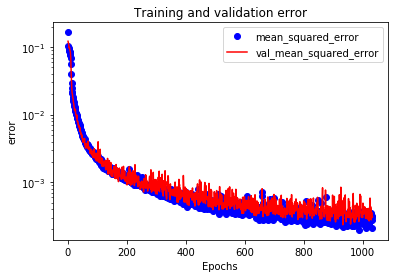

In [95]:
acc = history_dict['mean_squared_error']
val_acc = history_dict['val_mean_squared_error']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='mean_squared_error')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'r', label='val_mean_squared_error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.yscale('log')
plt.legend()

plt.show()

In [96]:
#now, let's test the performance of model 4

In [97]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justsol1.p'
file_name_y = 'Y_test_justsol1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [98]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.05023064 -0.66059884 -0.13647417 -0.99356736] [-9.77221131e-01 -3.99718933e-02 -3.52509135e-04 -5.39802526e-05
  2.22575002e-04  4.72626391e-04]
max for Y, X:  [ 0.65633652 -0.24603813  0.94158853  0.19412154] [ 9.86662770e-01 -3.99716951e-02 -3.52409321e-04 -5.38807062e-05
  2.22670742e-04  4.72725766e-04]


In [99]:
sort_index=np.argsort(test_data_x[:,0])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [100]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_4.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

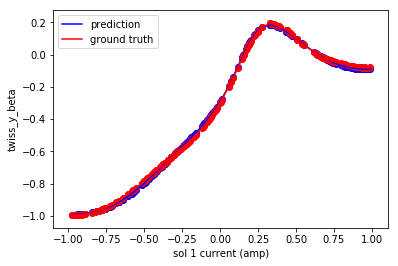

In [101]:
#now, we graph the result

which_parameter_to_plot=3

x_axis=test_data_x[:,0]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('sol 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [102]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad4.p'
file_name_y = 'Y_test_justquad4.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [103]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.20493509 -0.52765214  0.18701863 -0.75480081] [ 1.70986132e-04 -3.99718939e-02 -5.00529291e-01 -5.39807049e-05
  2.22573685e-04 -9.80478841e-01]
max for Y, X:  [ 0.22871819 -0.34454687  0.73103692 -0.02952656] [ 1.71185628e-04 -3.99716949e-02 -5.00529281e-01 -5.39707447e-05
  2.22583536e-04  9.98432247e-01]


In [104]:
sort_index=np.argsort(test_data_x[:,5])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [105]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_4.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

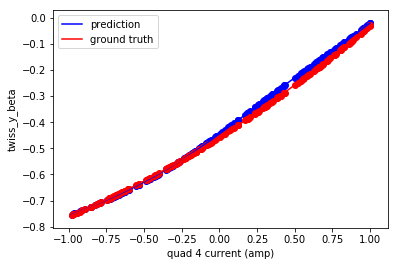

In [106]:
#now, we graph the result

which_parameter_to_plot=3

x_axis=test_data_x[:,5]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 4 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [107]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad1.p'
file_name_y = 'Y_test_justquad1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [108]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.2623439  -0.67689954  0.22886399 -0.75292571] [-1.79895899e-01 -3.99718943e-02 -9.67564791e-01 -5.39805878e-05
  2.22574874e-04  4.72626373e-04]
max for Y, X:  [ 0.53386497 -0.48101427  0.7992093  -0.1885591 ] [-1.79895700e-01 -3.99716951e-02  9.88009255e-01 -5.38811150e-05
  2.22673212e-04  4.72725885e-04]


In [109]:
sort_index=np.argsort(test_data_x[:,2])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [110]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_4.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

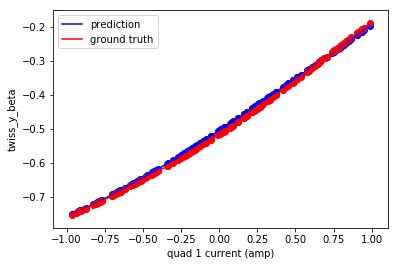

In [111]:
#now, we graph the result

which_parameter_to_plot=3

x_axis=test_data_x[:,2]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

# now, we are going to see how the model does when all parameters are varying

In [112]:
#now, let's see what happens when we vary all 6 input parameters

#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_all.p'
file_name_y = 'Y_test_all.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [113]:
#now, we want to know the input parameter range for this testing dataset

for index in range(0,len(features_list)):
    print('the feature is',features_list[index])
    print(max(test_data_x[:,index]))
    print(min(test_data_x[:,index]))
    print(' ')

the feature is sol_1_current
-2.5130218153905384
-3.4965535186125267
 
the feature is sol_2_current
2.7940099515853354
1.8031387429141603
 
the feature is A3Quad_1_current
-6.000577886535028
-7.997092421179527
 
the feature is A3Quad_2_current
6.498662389174472
4.505091637355917
 
the feature is A3Quad_3_current
4.590131038557003
2.6117306495442656
 
the feature is A3Quad_4_current
-7.318531220712396
-9.276508929364423
 


In [114]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [-1.03700062 -0.99562903 -0.51861037 -0.98572975] [-0.99330488 -0.99417757 -0.99779755 -0.99530188 -0.98830722 -0.97650228]
max for Y, X:  [0.91356605 0.8760724  0.99604475 0.85665049] [0.97448946 0.98856881 0.99942324 0.99894923 0.99061455 0.98240995]


In [115]:
total_predict_data=np.zeros((test_data_y.shape))

for index in range(0,test_data_y.shape[0]):
    prediction = model_1.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

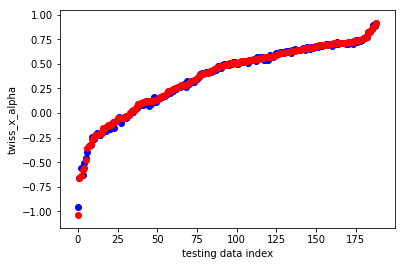

In [116]:
#now, we plot the ground truth and the prediction
#the y axis will be the objective
#the x axis will the testing data index

which_parameter_to_plot=0


#i can sort the data according to the y label
sort_index=np.argsort(test_data_y[:,which_parameter_to_plot])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]
total_predict_data=total_predict_data[sort_index,:]

x_axis=[]
for index in range(0,min(how_many_data_to_plot,test_data_y.shape[0])):
    x_axis.append(index) 

temp=test_data_y.shape[0]
    
#plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
#plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1])
plt.xlabel('testing data index')
plt.legend(loc='upper left')

plt.show()

In [117]:
total_predict_data=np.zeros((test_data_y.shape))

for index in range(0,test_data_y.shape[0]):
    prediction = model_2.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

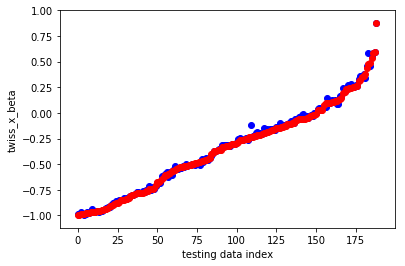

In [118]:
which_parameter_to_plot=1


#i can sort the data according to the y label
sort_index=np.argsort(test_data_y[:,which_parameter_to_plot])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]
total_predict_data=total_predict_data[sort_index,:]

x_axis=[]
for index in range(0,min(how_many_data_to_plot,test_data_y.shape[0])):
    x_axis.append(index) 

temp=test_data_y.shape[0]
    
#plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
#plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('testing data index')
plt.legend(loc='upper left')

plt.show()

In [119]:
total_predict_data=np.zeros((test_data_y.shape))

for index in range(0,test_data_y.shape[0]):
    prediction = model_3.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

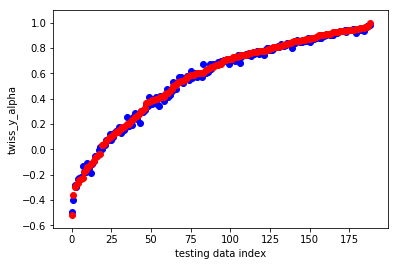

In [120]:
which_parameter_to_plot=2


#i can sort the data according to the y label
sort_index=np.argsort(test_data_y[:,which_parameter_to_plot])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]
total_predict_data=total_predict_data[sort_index,:]

x_axis=[]
for index in range(0,min(how_many_data_to_plot,test_data_y.shape[0])):
    x_axis.append(index) 

temp=test_data_y.shape[0]
    
#plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
#plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('testing data index')
plt.legend(loc='upper left')

plt.show()

In [121]:
total_predict_data=np.zeros((test_data_y.shape))

for index in range(0,test_data_y.shape[0]):
    prediction = model_4.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

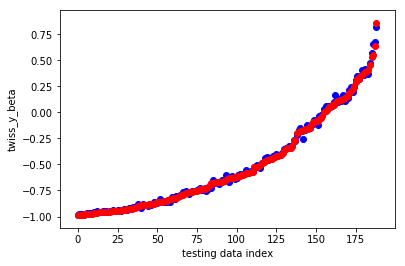

In [122]:
which_parameter_to_plot=3


#i can sort the data according to the y label
sort_index=np.argsort(test_data_y[:,which_parameter_to_plot])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]
total_predict_data=total_predict_data[sort_index,:]

x_axis=[]
for index in range(0,min(how_many_data_to_plot,test_data_y.shape[0])):
    x_axis.append(index) 

temp=test_data_y.shape[0]
    
#plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
#plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('testing data index')
plt.legend(loc='upper left')

plt.show()

# now, we are going to try to do the minimization/control step

In [123]:
error_history=[]

In [158]:
test_case_index=30

In [159]:
#note that regr is the surrogate model

#now, I can use the surrogate model as the core of a minimization scheme

def objective_function(x):
    
    #print('this objective function is being called')
    
    desired_output=np.array(test_data_y[test_case_index,:]) #<<<<<<<<<<<<<<<you tell the program what twiss parameter you want
    
    
    sol_1_current=x[0]
    sol_2_current=x[1]
    A3Quad_1_current=x[2]
    A3Quad_2_current=x[3]
    A3Quad_3_current=x[4]
    A3Quad_4_current=x[5]
    
    input_list=[sol_1_current,sol_2_current,A3Quad_1_current,A3Quad_2_current,A3Quad_3_current,A3Quad_4_current]
    #print('the input list is',input_list)
    input_list = np.asarray(input_list)
    input_list = np.reshape(input_list,(1,-1))
    
    
    #i cal the surrogate model
    prediction1 = model_1.predict(input_list)
    prediction2 = model_2.predict(input_list)
    prediction3 = model_3.predict(input_list)
    prediction4 = model_4.predict(input_list)

    r=[prediction1[0][0],prediction2[0][0],prediction3[0][0],prediction4[0][0]]
    r=np.asarray(r)
    r=np.reshape(r,(1,-1))
    

    
    #I compute the error
    error = sum(sum((r-desired_output)**2))
    
    #print('the error is',error)

    error_history.append(error)
    
    return error

In [179]:
#begin to minimize
from scipy.optimize import minimize

def begin_to_minimize():
    
    #bnds = ((0, 360), (0, 360))
    
    bnds = ((-1, 1), (-1, 1), (-1,1), (-1,1), (-1,1), (-1,1))
    
    #x0 = np.array([264,30])
    #res = minimize(angle_function, x0, method='TNC',bounds=bnds,options={'eps': 0.005,
    #                                                                    'scale': None, 'offset': None, 'mesg_num': None, 'maxCGit': -1, 'maxiter': None, 'eta': -1, 'stepmx': 0, 
    #                                                                     'accuracy': 0, 'minfev': 0, 'ftol': -1, 'xtol': -1, 'gtol': -1, 'rescale': -1, 'disp': False})
    
    #x0=test_data_x[initial_guess,:]
    x0=np.random.uniform(0,1,6)
    res = minimize(objective_function,x0,method='TNC',bounds=bnds, options={'eps':0.01})
    
    #res = minimize(angle_function, x0, method='TNC',bounds=bnds)
                   
    #print('*****')
    #print('the final result is',res)
    
    return res

In [161]:
#we want to have many random guess and then pick the one with the least distance

error_list_for_different_trial=[]
temp_final_result=np.zeros((0,test_data_x.shape[1]))

for index in range(0,30):

    
    r=begin_to_minimize()

    a_result=r.x
    a_result=np.reshape(a_result,(1,-1))

    if np.all(np.abs(a_result)<1):
        error_list_for_different_trial.append(r.fun)
        temp_final_result=np.concatenate((temp_final_result,a_result),axis=0)
    
    print('finished index',index)

finished index 0
finished index 1
finished index 2
finished index 3
finished index 4
finished index 5
finished index 6
finished index 7
finished index 8
finished index 9
finished index 10
finished index 11
finished index 12
finished index 13
finished index 14
finished index 15
finished index 16
finished index 17
finished index 18
finished index 19
finished index 20
finished index 21
finished index 22
finished index 23
finished index 24
finished index 25
finished index 26
finished index 27
finished index 28
finished index 29


In [162]:
selector=error_list_for_different_trial==min(error_list_for_different_trial)
result=temp_final_result[selector,:]

In [163]:
print('the true value is',test_data_x[test_case_index,:])
print('the predicted value is',result)

the true value is [-0.99330488 -0.28083559 -0.22815723  0.18689321  0.22148618  0.40261019]
the predicted value is [[-0.63135325 -0.55708921 -0.10608239  0.50259177  0.6137986   0.02012342]]


In [164]:
print('the true twiss parameter is',test_data_y[test_case_index,:])

prediction1 = model_1.predict(result)
prediction2 = model_2.predict(result)
prediction3 = model_3.predict(result)
prediction4 = model_4.predict(result)

r=[prediction1[0][0],prediction2[0][0],prediction3[0][0],prediction4[0][0]]
r=np.asarray(r)
r=np.reshape(r,(1,-1))


print('the predicted twiss parameter is',r)

the true twiss parameter is [ 0.71593587 -0.69836999  0.95628091 -0.93282978]
the predicted twiss parameter is [[ 0.71066505 -0.68649113  0.9315765  -0.94029826]]


In [165]:
result=np.reshape(result,(1,-1))

In [166]:
#now, we want to scale back all the data to its original numerical range

controler_twiss_input=test_data_y[test_case_index,:]
controler_twiss_input=(controler_twiss_input+1)*(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0))/2+np.min(total_data_y,axis=0)
r=(r+1)*(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0))/2+np.min(total_data_y,axis=0)

In [167]:
print('control input twiss parameter is',controler_twiss_input)
print('ml calculated twiss parameter is',r)

control input twiss parameter is [-0.54130678  9.58024946  0.86388732  5.98087058]
ml calculated twiss parameter is [[-0.70489104  9.93365808  0.25560619  5.36945191]]


In [168]:
gpt_input=test_data_x[test_case_index,:]
gpt_input=(gpt_input+1)*(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0))/2+np.min(total_data_x,axis=0)
result=(result+1)*(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0))/2+np.min(total_data_x,axis=0)

In [169]:
print('the gpt input used to generate control twiss parameter is',gpt_input)
print('the result from ML and optimization is',result)

the gpt input used to generate control twiss parameter is [-3.49655352  2.15962913 -7.22772427  5.68688341  3.82120531 -7.89805438]
the result from ML and optimization is [[-3.31564493  2.02157226 -7.10569259  6.00247427  4.21341437 -8.28035868]]


In [136]:
model_1.save('callback_seperate_model_1.h5')  # creates a HDF5 file 'my_model.h5'
model_2.save('callback_seperate_model_2.h5')  # creates a HDF5 file 'my_model.h5'
model_3.save('callback_seperate_model_3.h5')  # creates a HDF5 file 'my_model.h5'
model_4.save('callback_seperate_model_4.h5')  # creates a HDF5 file 'my_model.h5'

# now, let's do the test run here on my own computer

In [170]:
#now, let's see what happens when we vary all 6 input parameters

#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'ml_test_x.p'
file_name_y = 'ml_test_y.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [171]:
#now, we want to know the input parameter range for this testing dataset

for index in range(0,len(features_list)):
    print('the feature is',features_list[index])
    print(max(test_data_x[:,index]))
    print(min(test_data_x[:,index]))
    print(' ')

the feature is sol_1_current
-2.5535401366341226
-3.490168059038345
 
the feature is sol_2_current
2.7827898845997474
1.820028669634539
 
the feature is A3Quad_1_current
-6.011992400057493
-7.98315621162952
 
the feature is A3Quad_2_current
6.4963132208783545
4.530041997934385
 
the feature is A3Quad_3_current
4.547928755040279
2.614618680144133
 
the feature is A3Quad_4_current
-7.31182372347822
-9.284717302278011
 


In [172]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [-0.7203355  -0.98828415 -0.69249507 -0.9970959 ] [-0.98052921 -0.9603806  -0.98385641 -0.970343   -0.98541843 -0.98471457]
max for Y, X:  [0.87944926 0.50538799 0.99111143 0.689828  ] [0.89342271 0.96611731 0.98800469 0.99659926 0.94840114 0.98912065]


In [180]:
def objective_function(x):
    
    #print('this objective function is being called')
    
    desired_output=np.array(test_data_y[test_case_index,:]) #<<<<<<<<<<<<<<<you tell the program what twiss parameter you want
    
    #print('the test case index is',test_case_index)
    
    sol_1_current=x[0]
    sol_2_current=x[1]
    A3Quad_1_current=x[2]
    A3Quad_2_current=x[3]
    A3Quad_3_current=x[4]
    A3Quad_4_current=x[5]
    
    input_list=[sol_1_current,sol_2_current,A3Quad_1_current,A3Quad_2_current,A3Quad_3_current,A3Quad_4_current]
    #print('the input list is',input_list)
    input_list = np.asarray(input_list)
    input_list = np.reshape(input_list,(1,-1))
    
    
    #i cal the surrogate model
    prediction1 = model_1.predict(input_list)
    prediction2 = model_2.predict(input_list)
    prediction3 = model_3.predict(input_list)
    prediction4 = model_4.predict(input_list)

    r=[prediction1[0][0],prediction2[0][0],prediction3[0][0],prediction4[0][0]]
    r=np.asarray(r)
    r=np.reshape(r,(1,-1))
    

    
    #I compute the error
    error = sum(sum((r-desired_output)**2))
    
    #print('the error is',error)

    error_history.append(error)
    
    return error

In [181]:
fake_control_result=np.zeros((0,test_data_x.shape[1]))

for test_case_index in range(0,test_data_x.shape[0]):
    
    print('begin a fake control test case and the case index is',test_case_index)

    error_history=[]
    objective_function(np.random.uniform(0,1,6))
    
    error_list_for_different_trial=[]
    temp_final_result=np.zeros((0,test_data_x.shape[1]))

    for index in range(0,30):
        r=begin_to_minimize()
        a_result=r.x
        a_result=np.reshape(a_result,(1,-1))
        error_list_for_different_trial.append(r.fun)
        temp_final_result=np.concatenate((temp_final_result,a_result),axis=0)

    selector=error_list_for_different_trial==min(error_list_for_different_trial)
    result=temp_final_result[selector,:]
    
    print('the ml suggested scaled input is', result)
    
    fake_control_result=np.concatenate((fake_control_result,result),axis=0)
    
    print('finished a fake control and the test case index is',test_case_index)

begin a fake control test case and the case index is 0
the ml suggested scaled input is [[ 0.52912086  0.68517515  0.62934916 -0.03033256  0.15429349 -0.5449795 ]]
finished a fake control and the test case index is 0
begin a fake control test case and the case index is 1
the ml suggested scaled input is [[ 0.06377146  0.05177009 -0.06293933 -0.59749952  0.02325104  0.43483899]]
finished a fake control and the test case index is 1
begin a fake control test case and the case index is 2
the ml suggested scaled input is [[-0.58929667  0.98979138  0.49179858 -1.         -0.66394615 -0.46744541]]
finished a fake control and the test case index is 2
begin a fake control test case and the case index is 3
the ml suggested scaled input is [[ 0.01342741  0.53365273 -0.02333512  0.22199516  1.          0.38573128]]
finished a fake control and the test case index is 3
begin a fake control test case and the case index is 4
the ml suggested scaled input is [[ 0.77844185  0.98348501 -0.53432864  0.543

the ml suggested scaled input is [[ 0.03485695  0.99398834 -0.11449172  0.38036199 -0.15174738 -0.10601378]]
finished a fake control and the test case index is 38
begin a fake control test case and the case index is 39
the ml suggested scaled input is [[ 0.03459396 -0.66547051  0.70200305  0.34511603  0.66234578  0.96577617]]
finished a fake control and the test case index is 39
begin a fake control test case and the case index is 40
the ml suggested scaled input is [[ 0.60252695 -0.1932496  -0.93271292  0.04706954 -0.11447478  0.5085371 ]]
finished a fake control and the test case index is 40
begin a fake control test case and the case index is 41
the ml suggested scaled input is [[ 0.00504716  0.94241368  1.         -0.12243769 -0.05581146  0.39633429]]
finished a fake control and the test case index is 41
begin a fake control test case and the case index is 42
the ml suggested scaled input is [[ 0.55642911  0.03093494 -0.35156564  0.25486683 -0.11033642  0.3744563 ]]
finished a fake

the ml suggested scaled input is [[ 1.          0.57762999 -0.95328742  0.62737864 -0.87379423  1.        ]]
finished a fake control and the test case index is 76
begin a fake control test case and the case index is 77
the ml suggested scaled input is [[ 0.19430731 -0.12529045 -0.00181315  0.15153282 -0.13963707  0.78129392]]
finished a fake control and the test case index is 77


In [183]:
# i need to scale the data up and save the data
scaled_up_fake_control=(fake_control_result+1)*(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0))/2+np.min(total_data_x,axis=0)


In [184]:
scaled_up_fake_control

array([[-2.7356234 ,  2.64238993, -6.37052111,  5.46973175,  3.75403032,
        -8.84519201],
       [-2.96821168,  2.32584777, -7.06256479,  4.90275828,  3.6230224 ,
        -7.86584096],
       [-3.29462445,  2.79462093, -6.50802305,  4.50039512,  2.93600626,
        -8.76769491],
       [-2.99337435,  2.56666709, -7.02297458,  5.72197339,  4.59951402,
        -7.91492524],
       [-2.61100921,  2.79146934, -7.5337874 ,  6.0429593 ,  3.81818171,
        -7.93049414],
       [-3.3547554 ,  2.67608538, -6.6386874 ,  4.50039512,  2.60004095,
        -7.95571364],
       [-3.10633505,  1.88528296, -6.52913814,  5.83415643,  4.15343395,
        -7.9947089 ],
       [-2.94137112,  2.75134698, -6.38402968,  4.97081973,  3.22772525,
        -7.66008732],
       [-3.4940667 ,  2.30531922, -6.00000133,  5.86750913,  3.41861587,
        -9.00690935],
       [-3.05557674,  2.79972265, -6.23561985,  5.27156631,  3.464127  ,
        -7.85110644],
       [-3.49989984,  2.07603491, -6.72388466,  5.

In [185]:
pickle.dump(scaled_up_fake_control, open('callback_seperate_ml_control_result.p', "wb"))